# Task 1: Retrieving and Preparing the Data

## check num dead and alive

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

In [2]:
df = pd.read_csv("./DataSets/Heart failure clinical records Data set/heart_failure_clinical_records_dataset.csv")

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

We can see that there are no missing values present in the data set.

In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

The data types of the values in the data set are shown below. It can be seen that `age` is a float, despite the age being in years. Therefore it should be converted into an integer. I am not going to be changing the boolean values as integers as this is necessary for classification.

In [6]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

The data types now all match.

In [7]:
df['age'] = df['age'].astype('int')
df.dtypes

age                           int64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

Check to see if they meet all of the required ranges.

In [8]:
df.describe(include=['int64', 'float64']).T.style.set_precision(3)

,count,mean,std,min,25%,50%,75%,max
age,299.000,60.829,11.895,40.000,51.000,60.000,70.000,95.000
anaemia,299.000,0.431,0.496,0.000,0.000,0.000,1.000,1.000
creatinine_phosphokinase,299.000,581.839,970.288,23.000,116.500,250.000,582.000,7861.000
diabetes,299.000,0.418,0.494,0.000,0.000,0.000,1.000,1.000
ejection_fraction,299.000,38.084,11.835,14.000,30.000,38.000,45.000,80.000
high_blood_pressure,299.000,0.351,0.478,0.000,0.000,0.000,1.000,1.000
platelets,299.000,263358.029,97804.237,25100.000,212500.000,262000.000,303500.000,850000.000
serum_creatinine,299.000,1.394,1.035,0.500,0.900,1.100,1.400,9.400
serum_sodium,299.000,136.625,4.412,113.000,134.000,137.000,140.000,148.000
sex,299.000,0.649,0.478,0.000,0.000,1.000,1.000,1.000


# Data Exploration

I will first create an updated data set to change the boolean values to the corresponding values (e.g. changing `Sex` to have 'Man' and 'Woman' to help to interpret the data more easily

In [9]:
g_df = df.copy()
cols = ['anaemia', 'high_blood_pressure', 'diabetes', 'sex', 'smoking', 'DEATH_EVENT']
for col in cols:
    g_df[col] = g_df[col].astype('str')

# anaemia
g_df['anaemia'] = g_df['anaemia'].str.replace('0','No Anaemia')
g_df['anaemia'] = g_df['anaemia'].str.replace('1','Anaemia')

# high blood pressure
g_df['high_blood_pressure'] = g_df['high_blood_pressure'].str.replace('0','Not High Blood Pressure')
g_df['high_blood_pressure'] = g_df['high_blood_pressure'].str.replace('1','High Blood Pressure')

# diabetes
g_df['diabetes'] = g_df['diabetes'].str.replace('0','Non-Diabetic')
g_df['diabetes'] = g_df['diabetes'].str.replace('1','Diabetic')

# sex
g_df['sex'] = g_df['sex'].str.replace('0','Woman')
g_df['sex'] = g_df['sex'].str.replace('1','Man')

# smoking
g_df['smoking'] = g_df['smoking'].str.replace('0','Non-Smoker')
g_df['smoking'] = g_df['smoking'].str.replace('1','Smoker')

# death event
g_df['DEATH_EVENT'] = g_df['DEATH_EVENT'].str.replace('0','Not Dead')
g_df['DEATH_EVENT'] = g_df['DEATH_EVENT'].str.replace('1','Dead')


### MAYBE CHANGE SOME OF THE CATEGORICAL ONES TO LIKE PIE CHARTS????
### SPLIT INTO EXPLORING NUMERICAL AND CATEGORICAL (then age would go to the bottom also have sub-headings)
### Fix all of them figure numbers
### Add measurements in the x axis label (e.g. age - years, time - days, CPK - mcg/L)

I will first explore the distribution of the age of all the patients in the data set. 

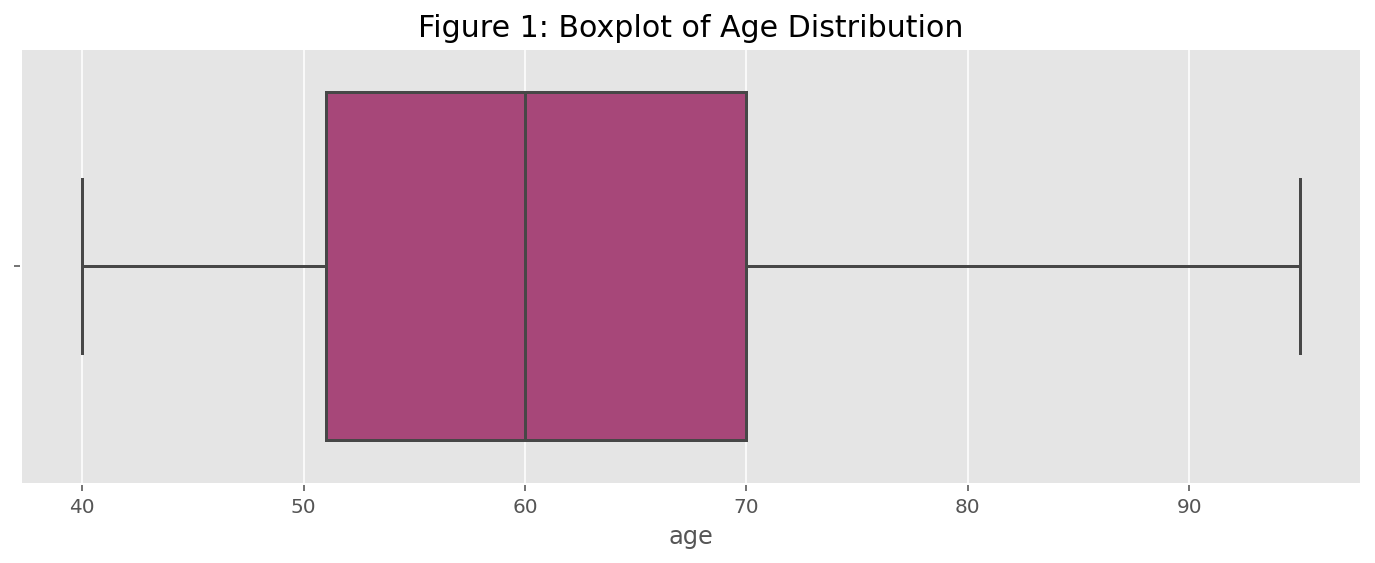

In [10]:
plt.figure(figsize = (12,4))
sns.boxplot(df['age'], palette='magma').set_title('Figure 1: Boxplot of Age Distribution', fontsize = 15)
plt.show();

Creatinine Phosphokinase (CPK)

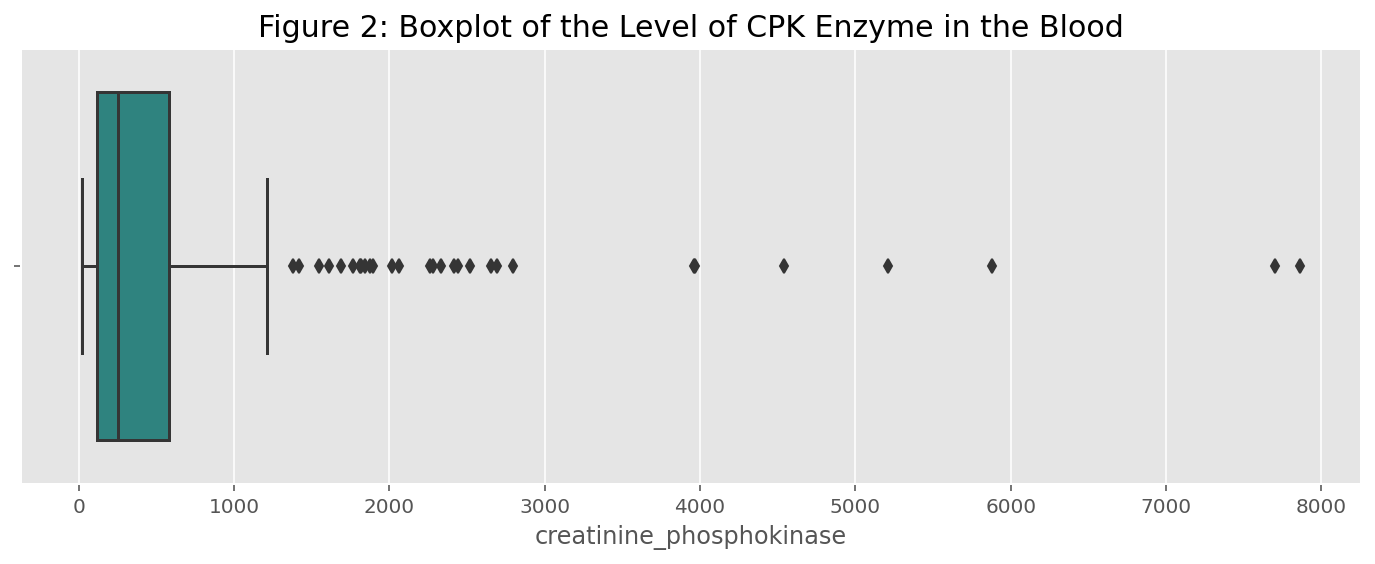

In [11]:
plt.figure(figsize = (12,4))
sns.boxplot(df['creatinine_phosphokinase'], palette='viridis').set_title('Figure 2: Boxplot of the Level of CPK Enzyme in the Blood', fontsize = 15)
plt.show();

Ejection Fraction - this is the percentage of blood leaving the heart at each contraction.

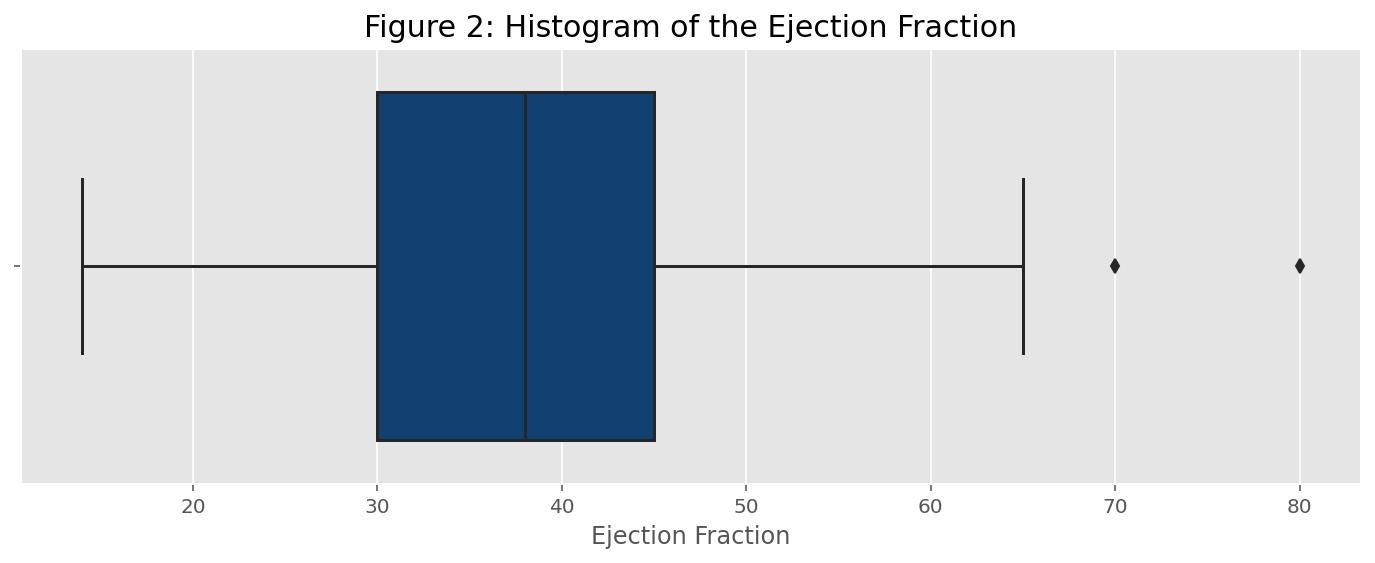

In [12]:
plt.figure(figsize = (12,4))
sns.boxplot(df['ejection_fraction'], palette='ocean').set_title('Figure 2: Histogram of the Ejection Fraction', fontsize = 15)
plt.xlabel('Ejection Fraction')
plt.show();

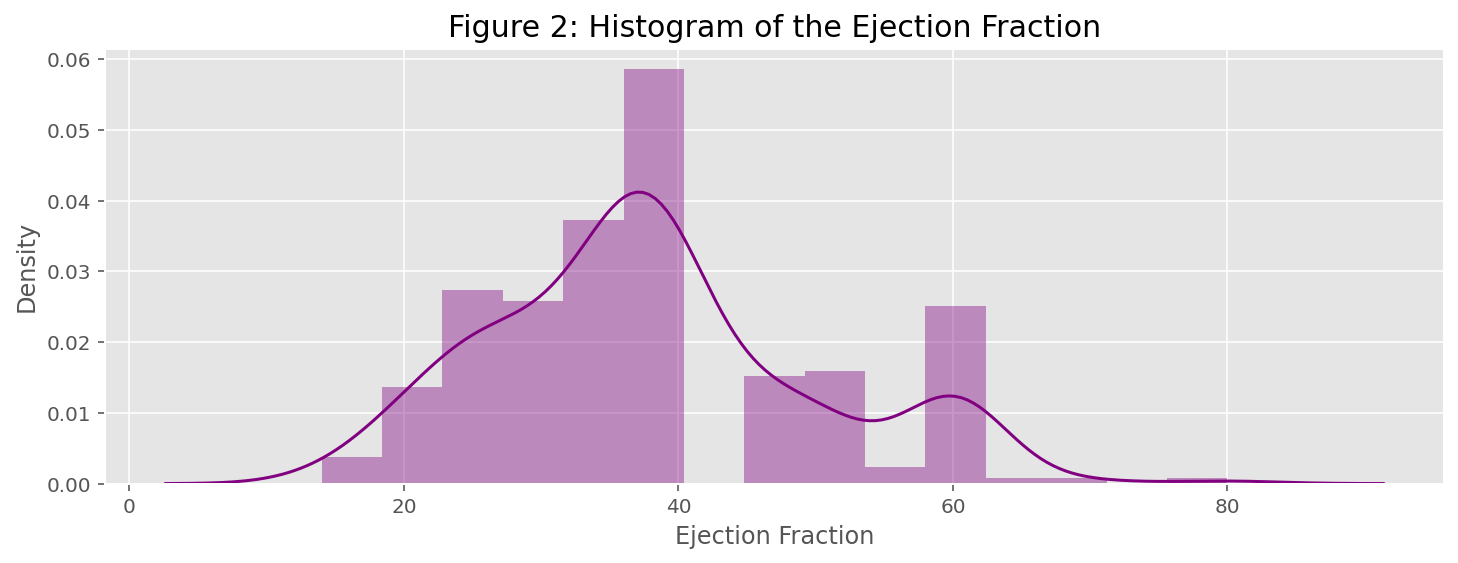

In [13]:
plt.figure(figsize = (12,4))
sns.distplot(df['ejection_fraction'], kde=True, bins=15, color = 'purple').set_title('Figure 2: Histogram of the Ejection Fraction', fontsize = 15)
plt.xlabel('Ejection Fraction')
plt.show();

Platelets - in the blood

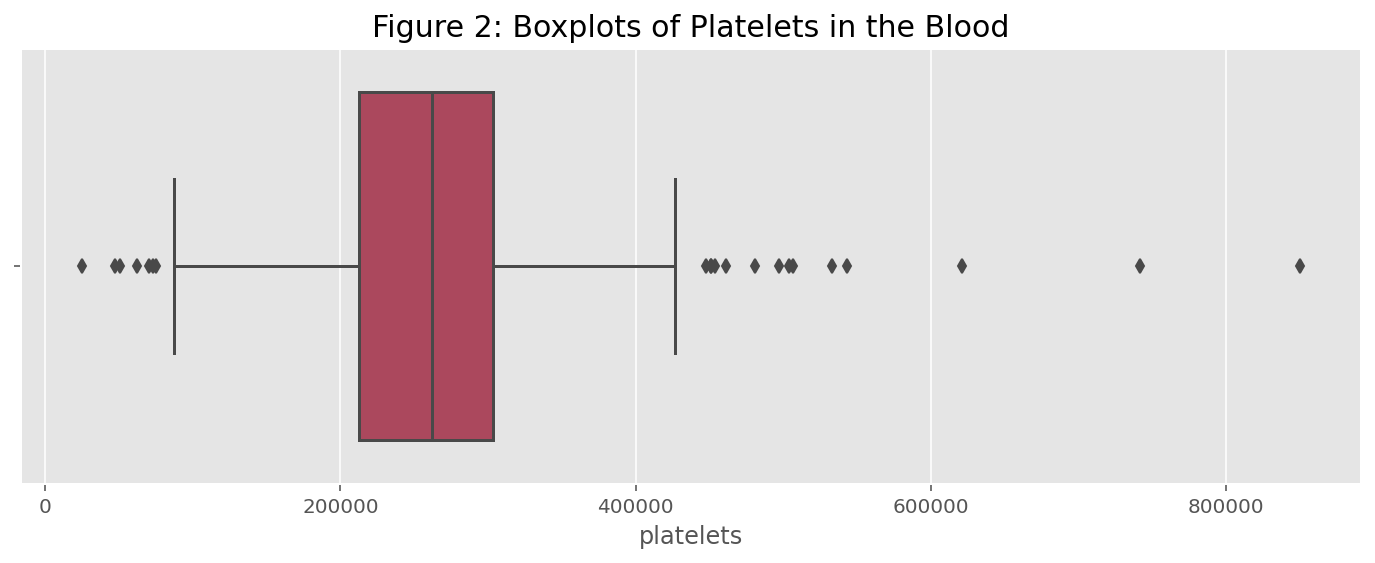

In [14]:
plt.figure(figsize = (12,4))
sns.boxplot(df['platelets'], palette='inferno').set_title('Figure 2: Boxplots of Platelets in the Blood', fontsize = 15)
plt.show();

Prefer the histogram  - maybe see if theres other `red` colour types

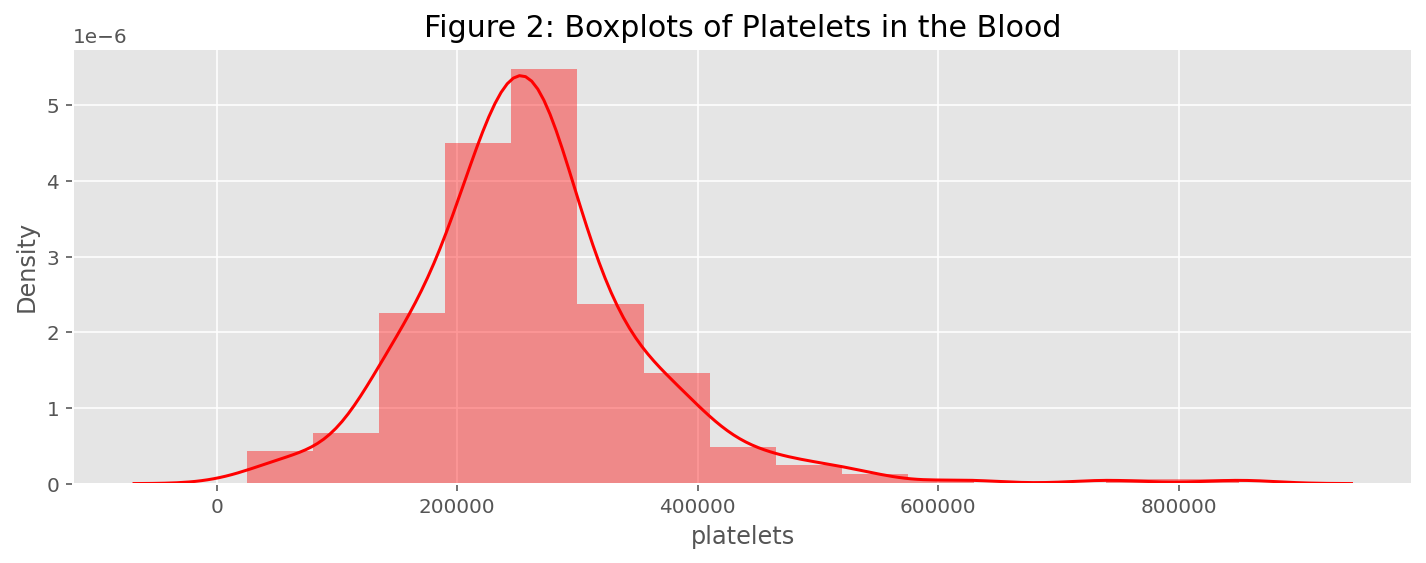

In [15]:
plt.figure(figsize = (12,4))
sns.distplot(df['platelets'], kde=True, bins=15, color = 'red').set_title('Figure 2: Boxplots of Platelets in the Blood', fontsize = 15)
plt.show();

Serum Creatinine - level of creatinine in the blood

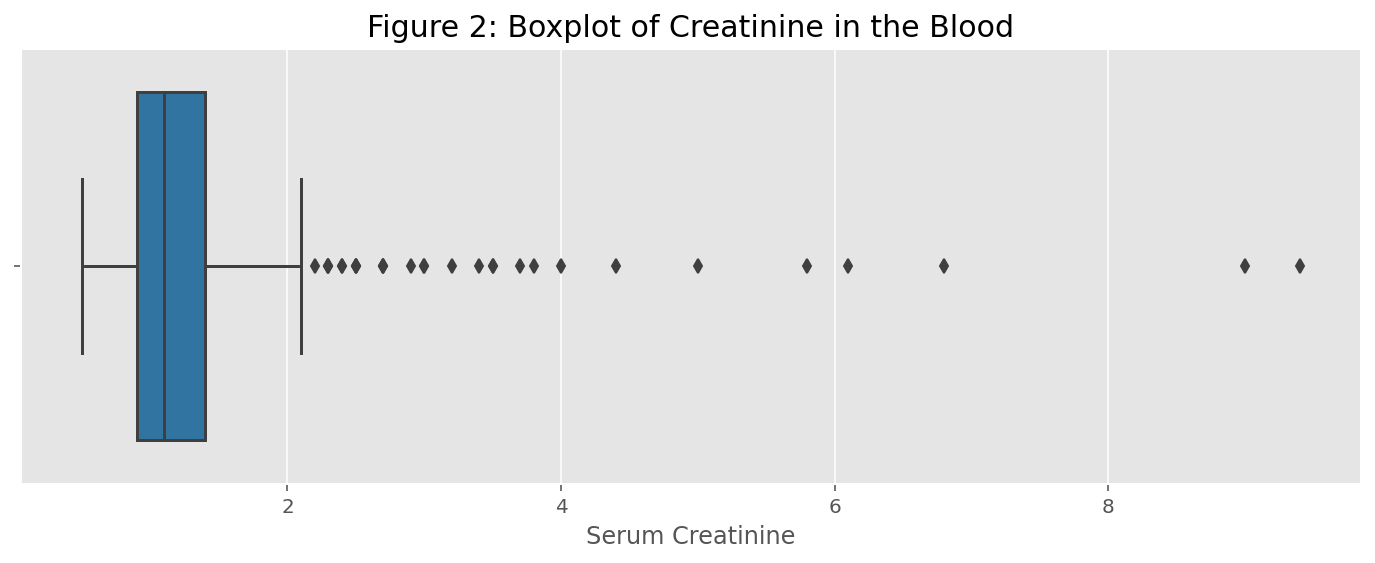

In [16]:
plt.figure(figsize = (12,4))
sns.boxplot(df['serum_creatinine'], palette='tab20').set_title('Figure 2: Boxplot of Creatinine in the Blood', fontsize = 15)
plt.xlabel('Serum Creatinine')
plt.show();

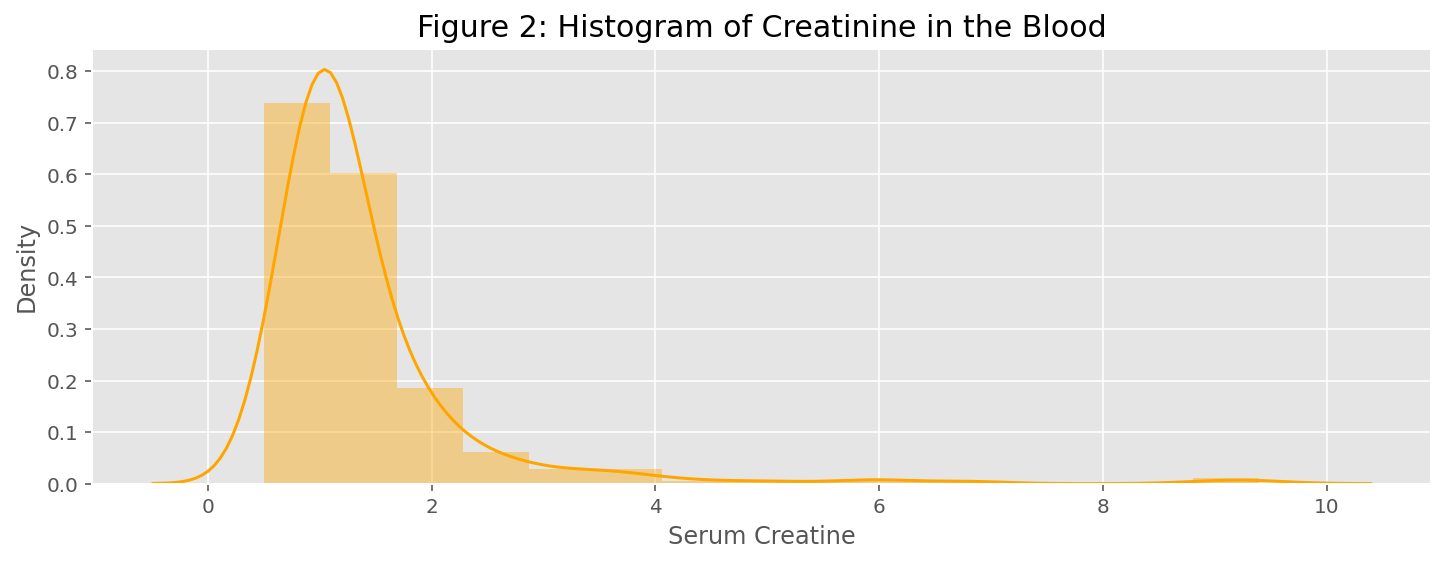

In [17]:
plt.figure(figsize = (12,4))
sns.distplot(df['serum_creatinine'], kde=True, bins=15, color = 'orange').set_title('Figure 2: Histogram of Creatinine in the Blood', fontsize = 15)
plt.xlabel('Serum Creatine')
plt.show();

Serum Sodium - level of sodium in the blood

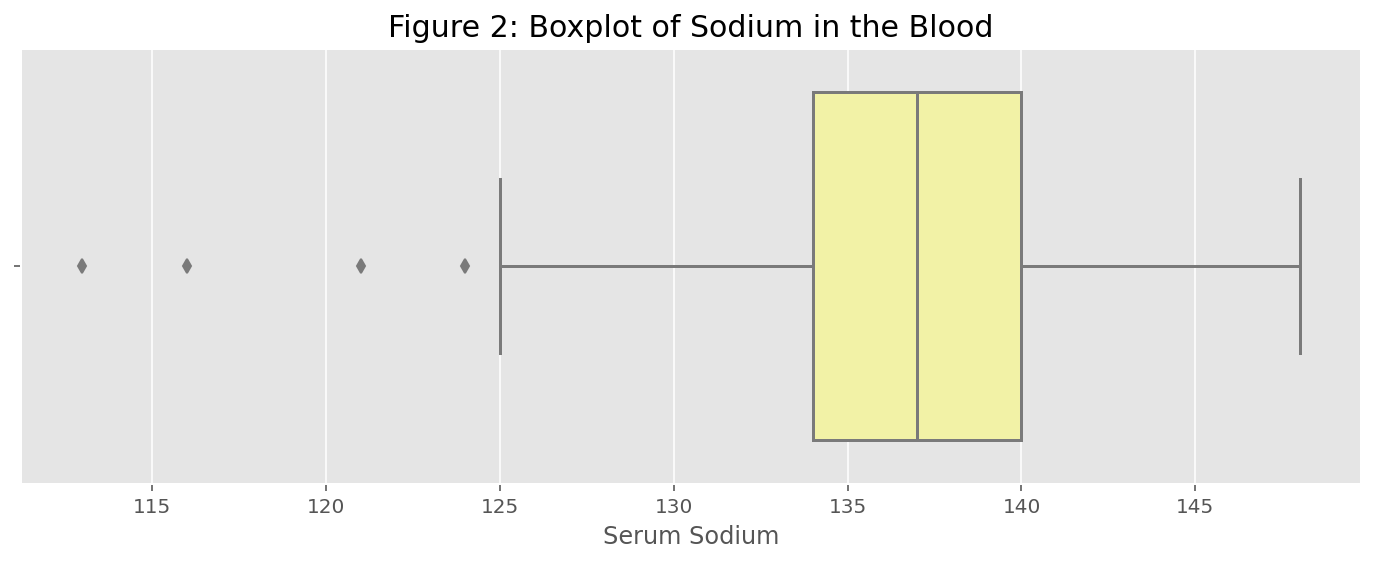

In [18]:
plt.figure(figsize = (12,4))
sns.boxplot(df['serum_sodium'], palette='Accent_r').set_title('Figure 2: Boxplot of Sodium in the Blood', fontsize = 15)
plt.xlabel('Serum Sodium')
plt.show();

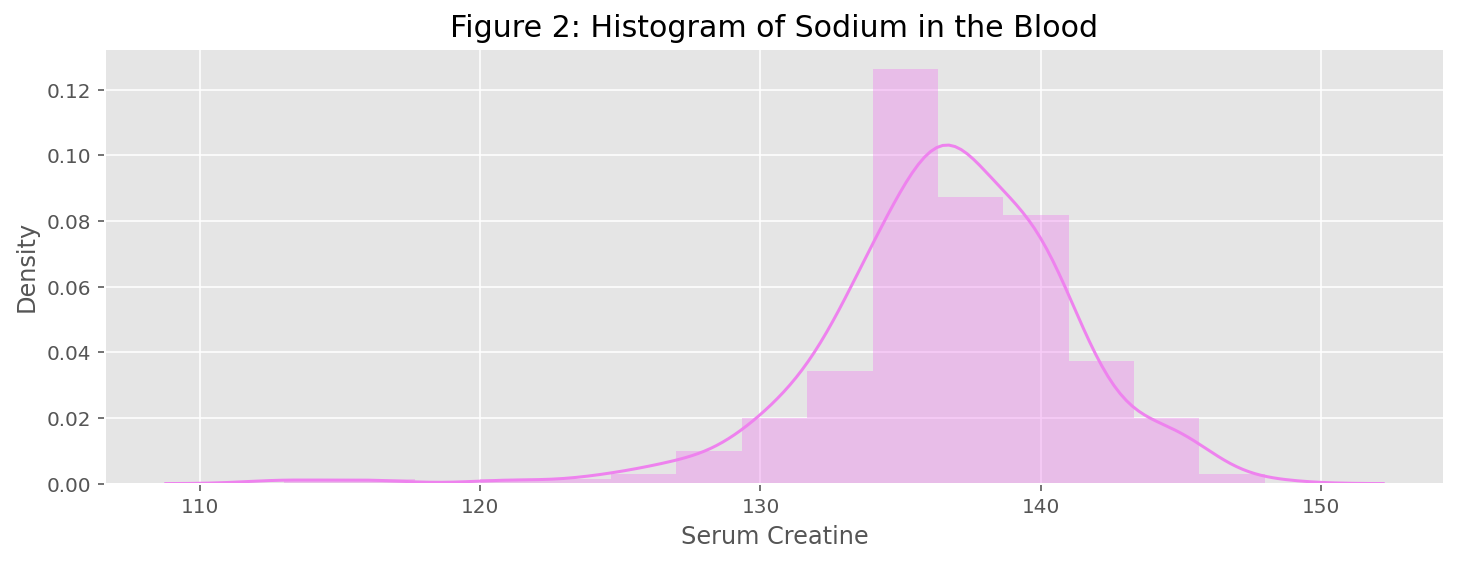

In [19]:
plt.figure(figsize = (12,4))
sns.distplot(df['serum_sodium'], kde=True, bins=15, color = 'violet').set_title('Figure 2: Histogram of Sodium in the Blood', fontsize = 15)
plt.xlabel('Serum Creatine')
plt.show();

Time of follow-up period in days

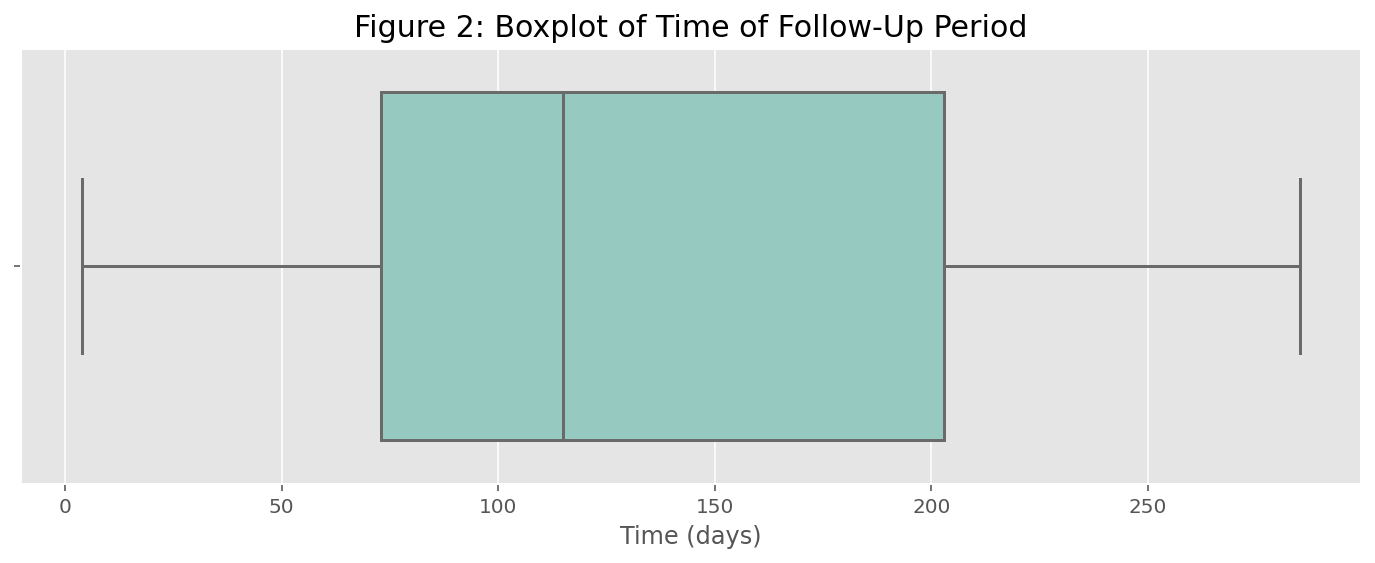

In [20]:
plt.figure(figsize = (12,4))
sns.boxplot(df['time'], palette='Set3').set_title('Figure 2: Boxplot of Time of Follow-Up Period', fontsize = 15)
plt.xlabel('Time (days)')
plt.show();

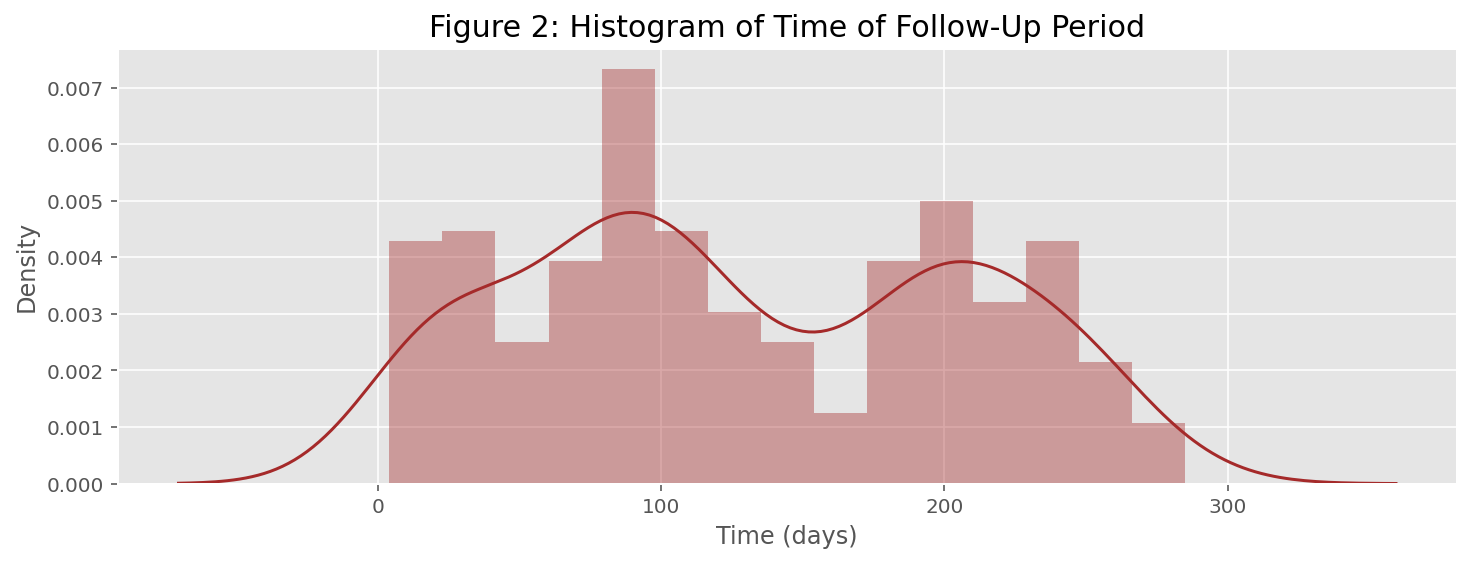

In [21]:
plt.figure(figsize = (12,4))
sns.distplot(df['time'], kde=True, bins=15, color = 'brown').set_title('Figure 2: Histogram of Time of Follow-Up Period', fontsize = 15)
plt.xlabel('Time (days)')
plt.show();

Distribution of sex for all the patients.

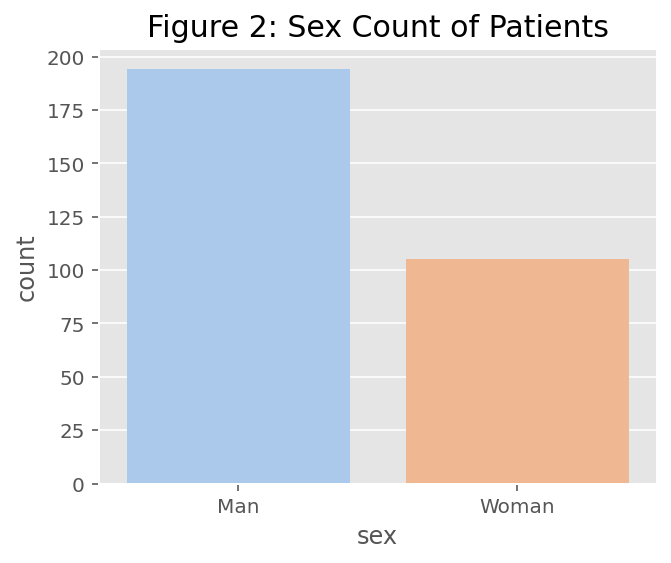

In [22]:
plt.figure(figsize = (5,4))
fig = sns.countplot(x = 'sex', data = g_df, palette = 'pastel')
fig = plt.title('Figure 2: Sex Count of Patients', fontsize = 15)
plt.show()

Distribution of smokers and non-smokers.

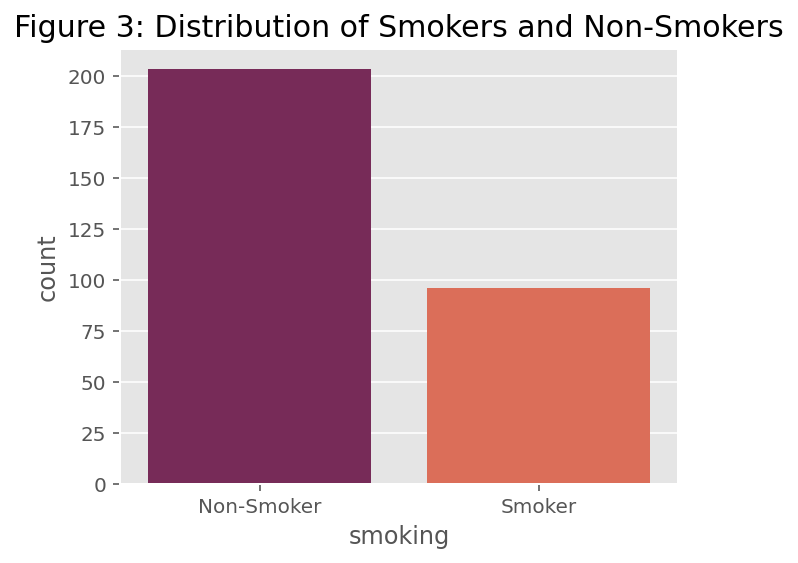

In [23]:
plt.figure(figsize = (5,4))
fig = sns.countplot(x = 'smoking', data = g_df, palette = 'rocket')
fig = plt.title('Figure 3: Distribution of Smokers and Non-Smokers', fontsize = 15)
plt.show()

See if patients are diabetic or not.

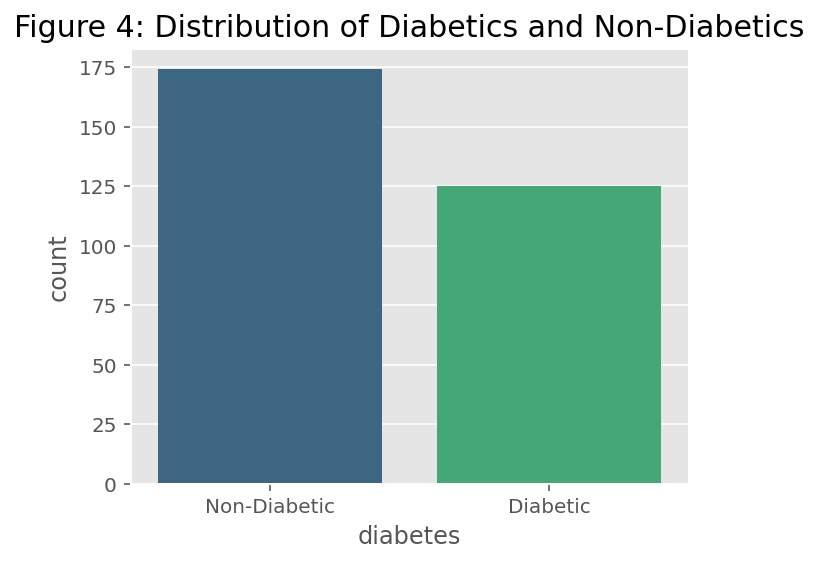

In [24]:
plt.figure(figsize = (5,4))
fig = sns.countplot(x = 'diabetes', data = g_df, palette = 'viridis')
fig = plt.title('Figure 4: Distribution of Diabetics and Non-Diabetics', fontsize = 15)
plt.show()

Anaemia

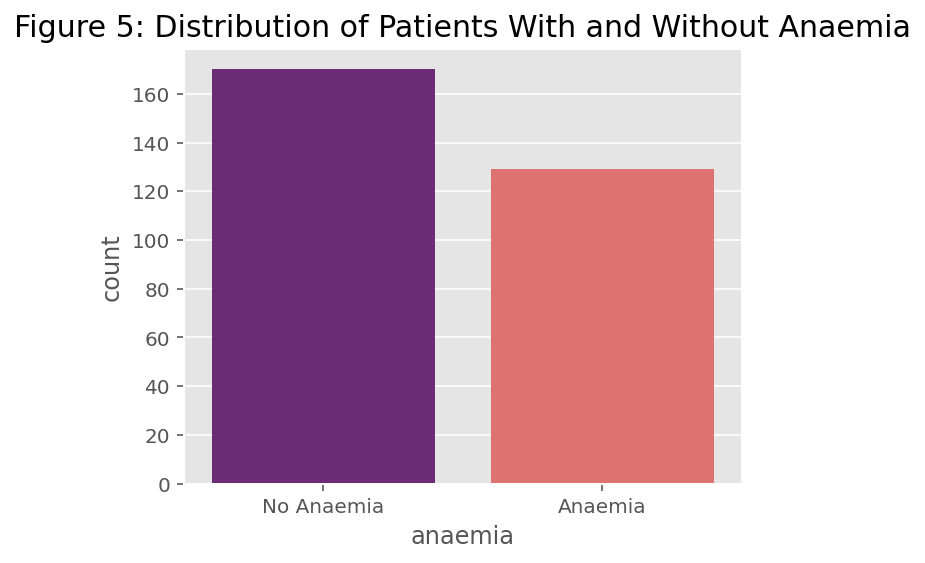

In [25]:
plt.figure(figsize = (5,4))
fig = sns.countplot(x = 'anaemia', data = g_df, palette = 'magma')
fig = plt.title('Figure 5: Distribution of Patients With and Without Anaemia', fontsize = 15)
plt.show()

High-Blood Pressure

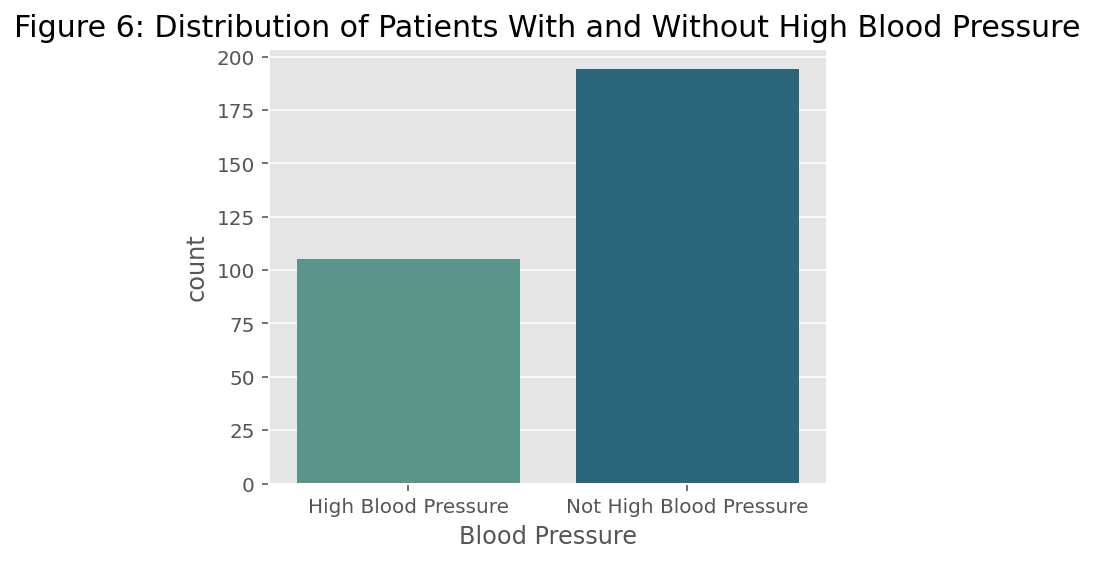

In [26]:
plt.figure(figsize = (5,4))
fig = sns.countplot(x = 'high_blood_pressure', data = g_df, palette = 'crest')
fig = plt.title('Figure 6: Distribution of Patients With and Without High Blood Pressure', fontsize = 15)
fig = plt.xlabel('Blood Pressure')
plt.show()

For the relationship see if theres one between age and the death event because you know, the older you are the more likely it is that you will die.

could have box plots of the death event and then the ages or something like that and also age and sex

Relationship between death event and sex.

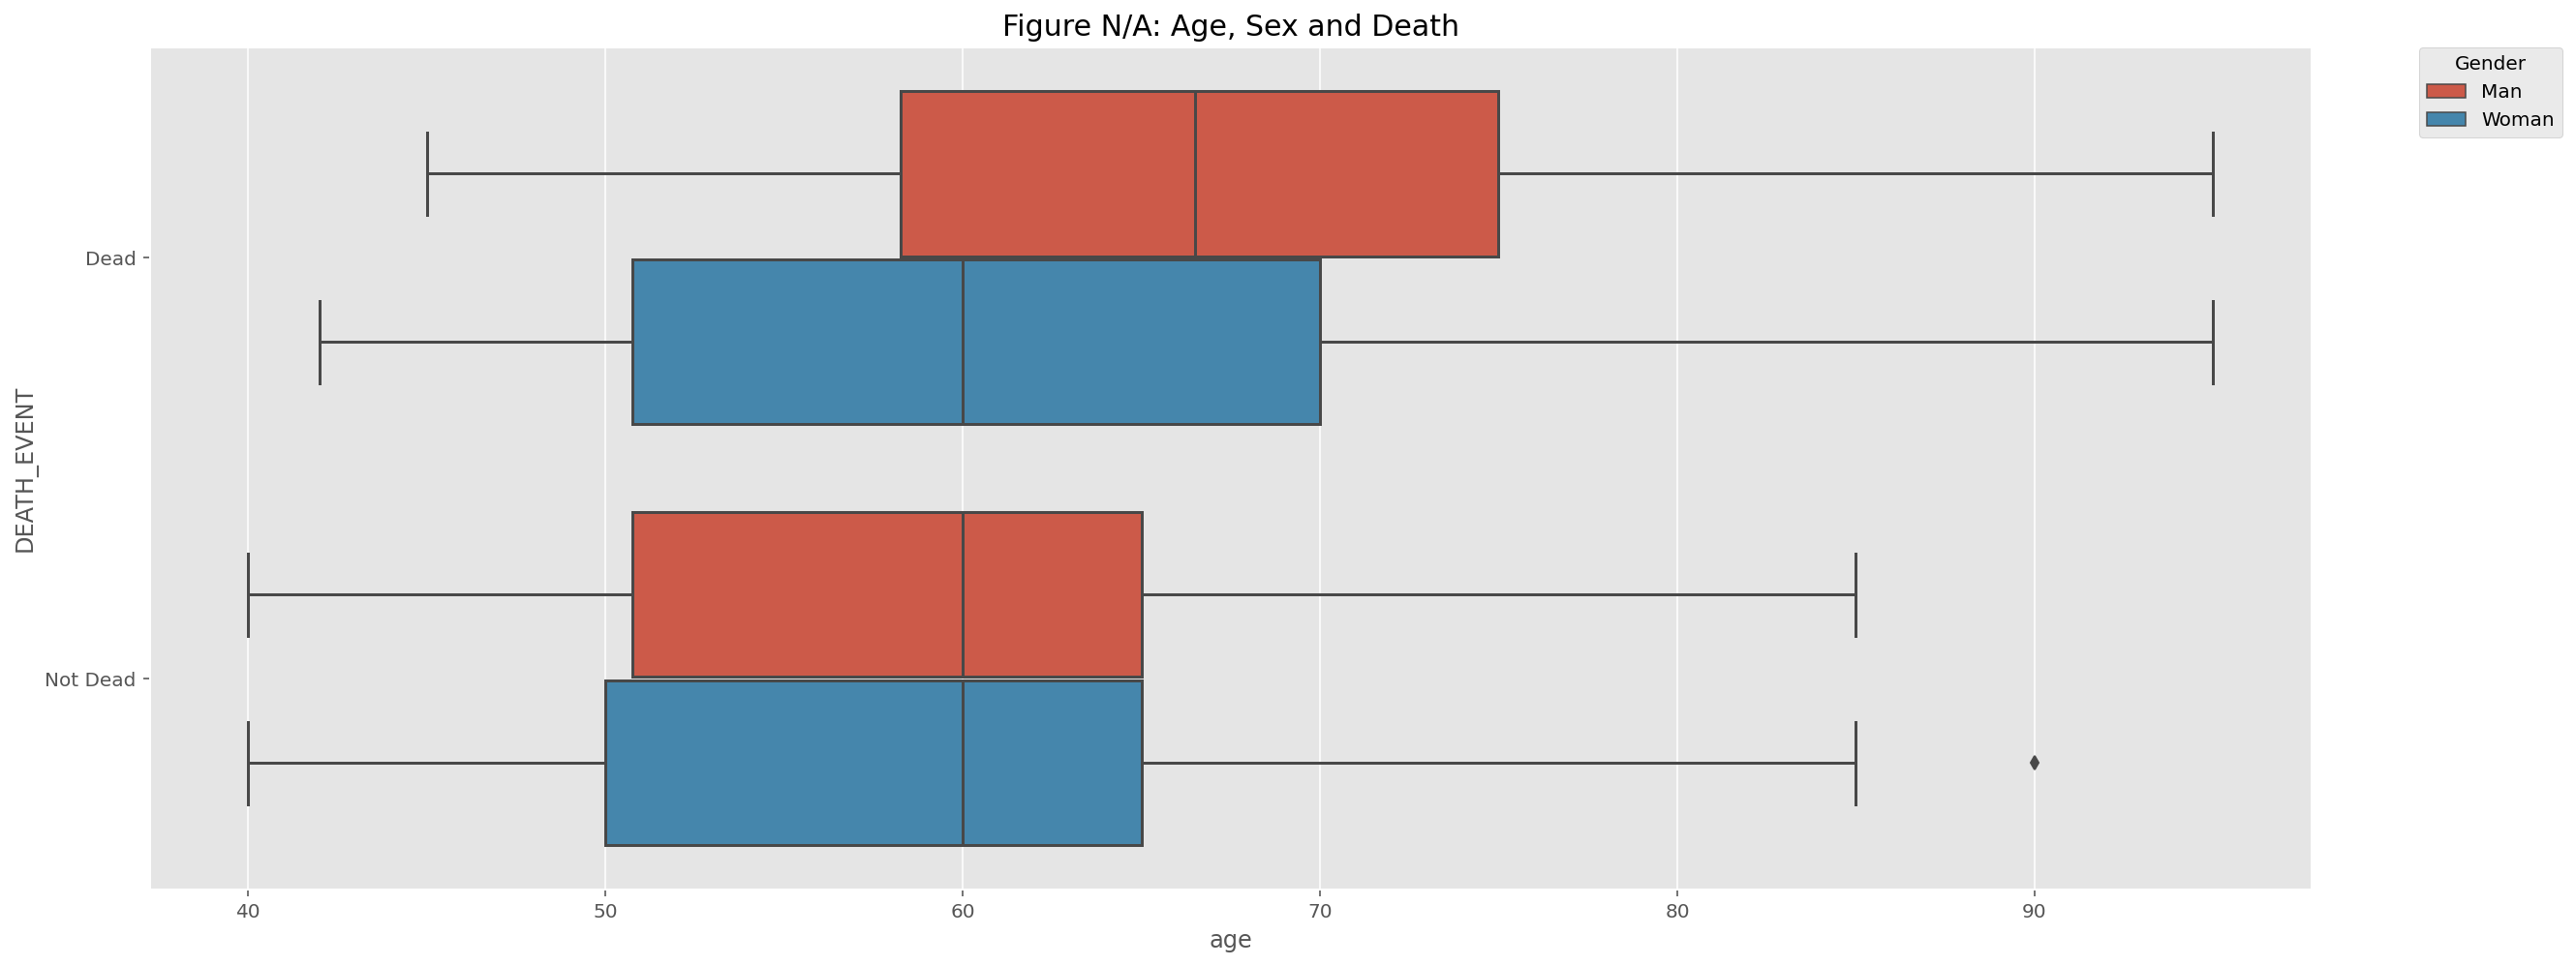

In [27]:
plt.figure(figsize = (20,8))
sns.boxplot(x="age",
               y="DEATH_EVENT",
               hue="sex", 
               data=g_df);

# position the legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.,
          title="Gender");

# set the x-axis title
plt.xlabel("age");
plt.title('Figure N/A: Age, Sex and Death', fontsize = 15)
plt.show()

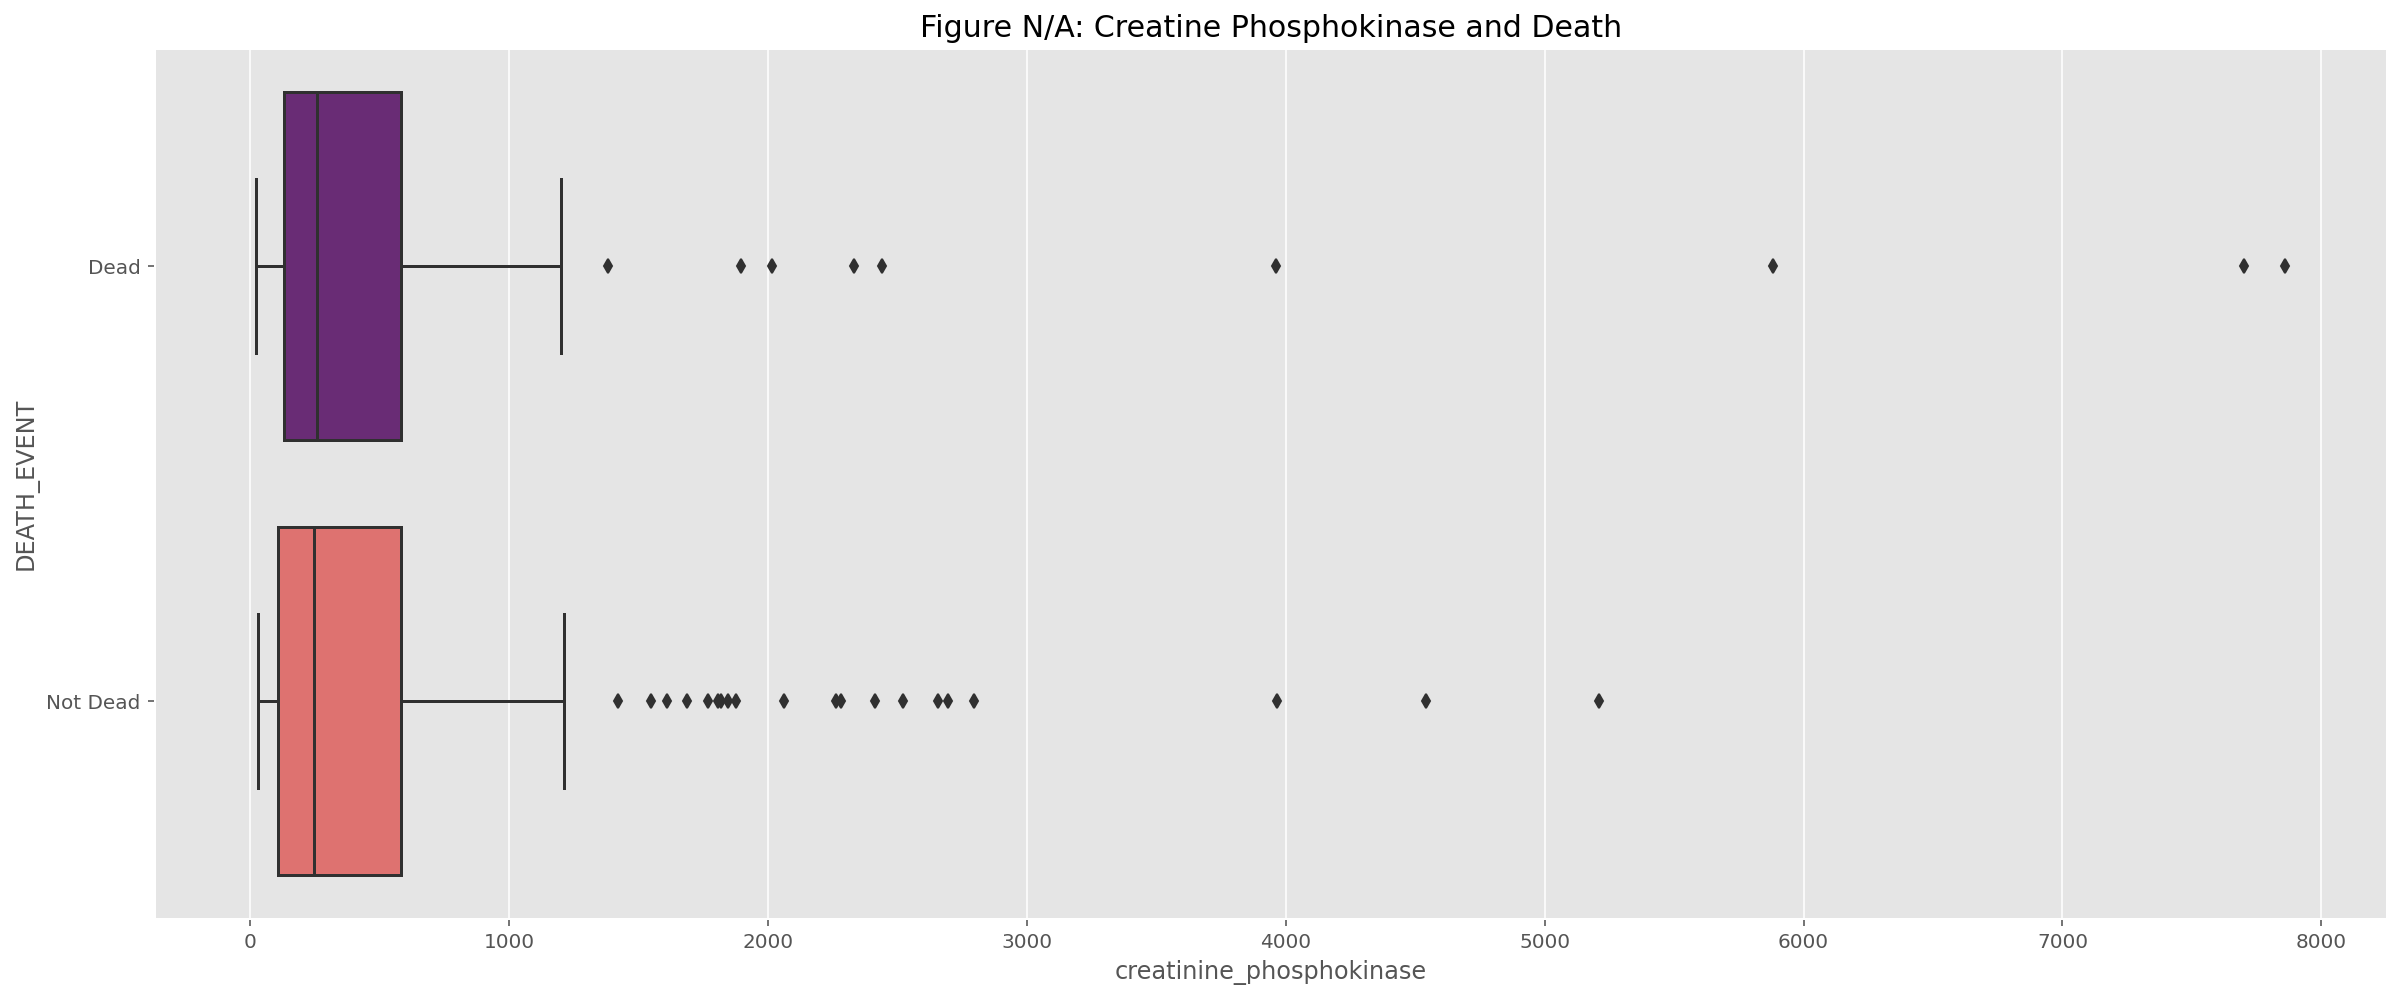

In [28]:
plt.figure(figsize = (20,8))
sns.boxplot(g_df['creatinine_phosphokinase'], g_df['DEATH_EVENT'], palette = 'magma');
plt.title('Figure N/A: Creatine Phosphokinase and Death', fontsize = 15)
plt.show();

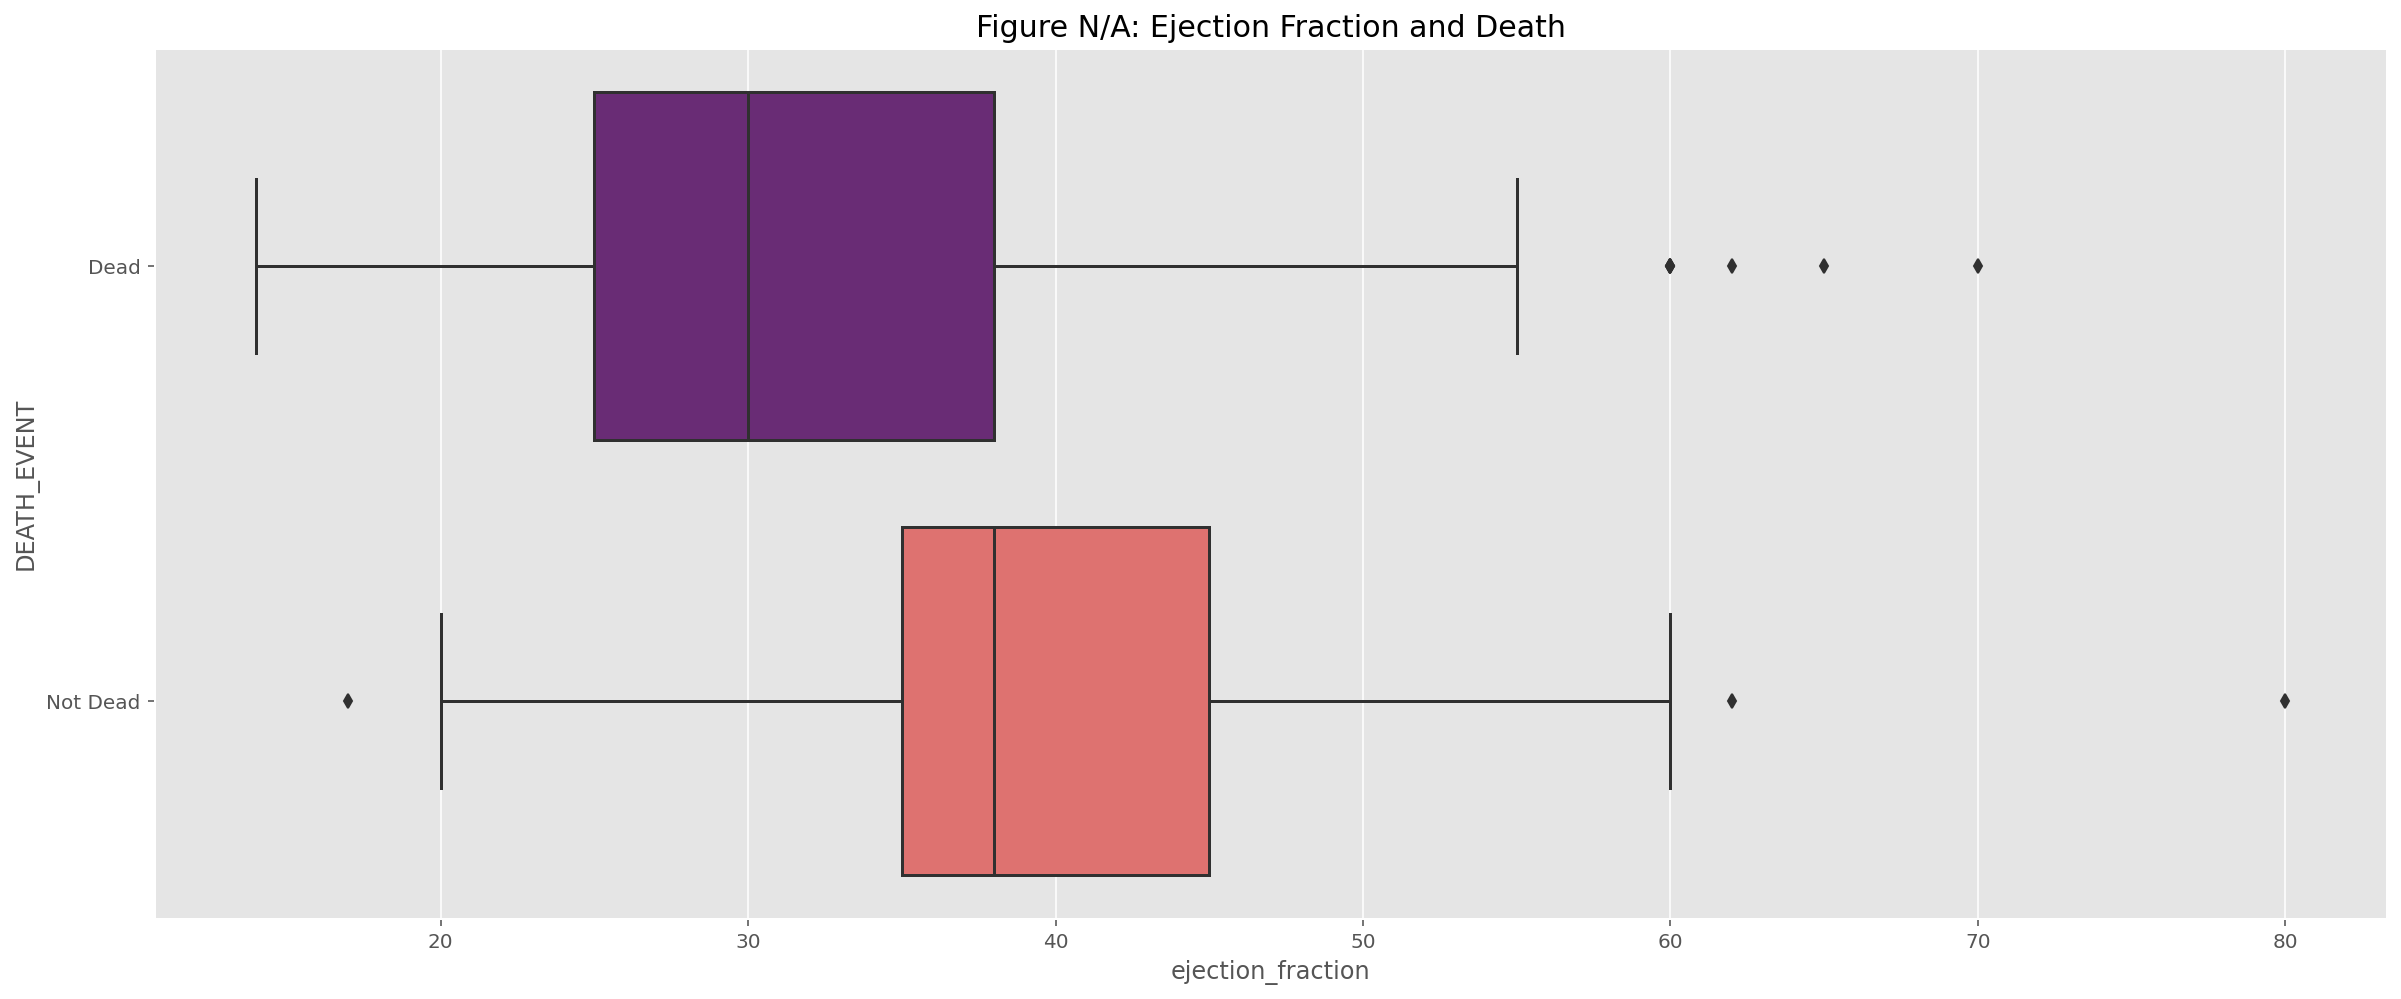

In [29]:
plt.figure(figsize = (20,8))
sns.boxplot(g_df['ejection_fraction'], g_df['DEATH_EVENT'], palette = 'magma');
plt.title('Figure N/A: Ejection Fraction and Death', fontsize = 15)
plt.show();

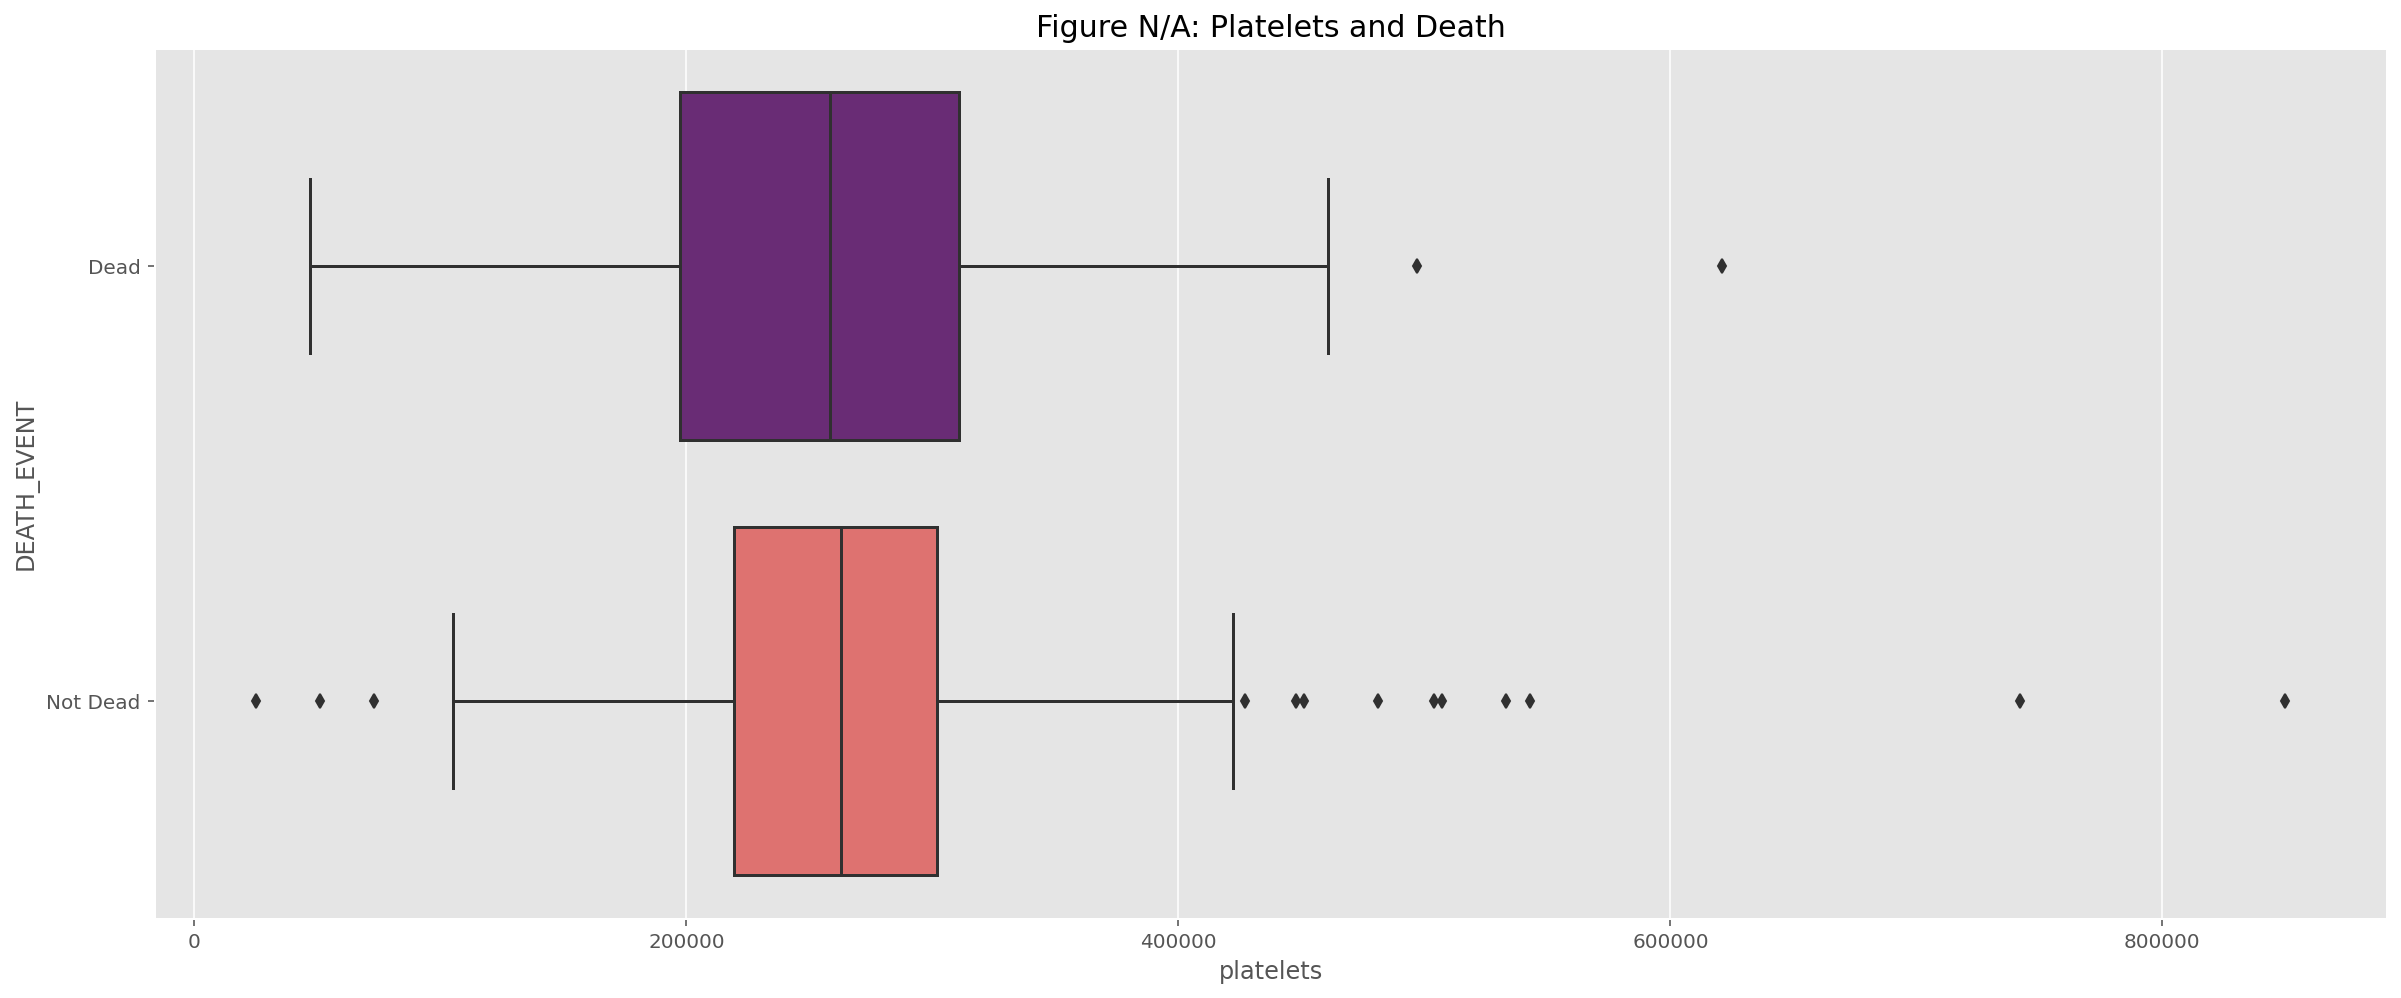

In [30]:
plt.figure(figsize = (20,8))
sns.boxplot(g_df['platelets'], g_df['DEATH_EVENT'], palette = 'magma');
plt.title('Figure N/A: Platelets and Death', fontsize = 15)
plt.show();

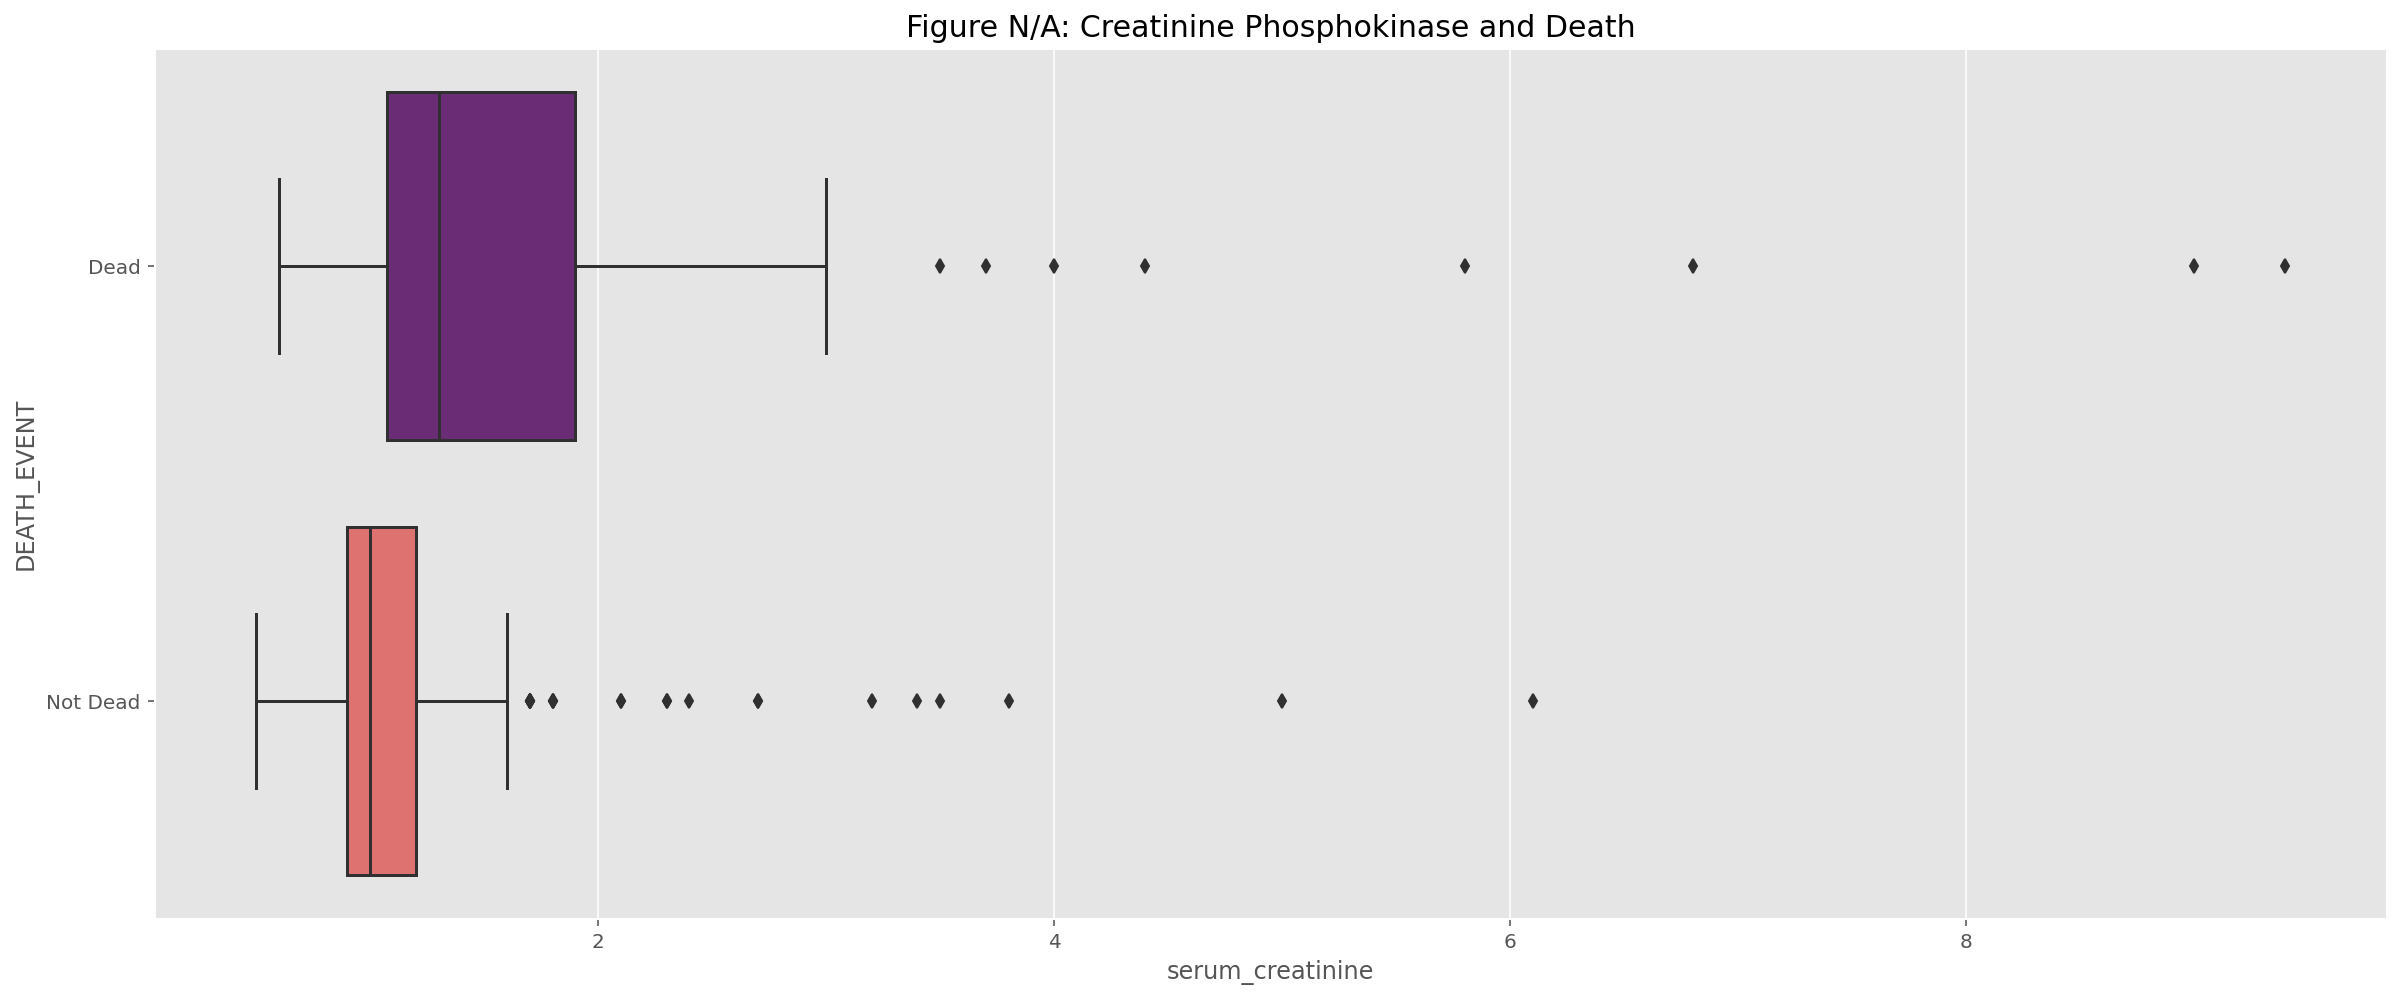

In [31]:
plt.figure(figsize = (20,8))
sns.boxplot(g_df['serum_creatinine'], g_df['DEATH_EVENT'], palette = 'magma');
plt.title('Figure N/A: Creatinine Phosphokinase and Death', fontsize = 15)
plt.show();

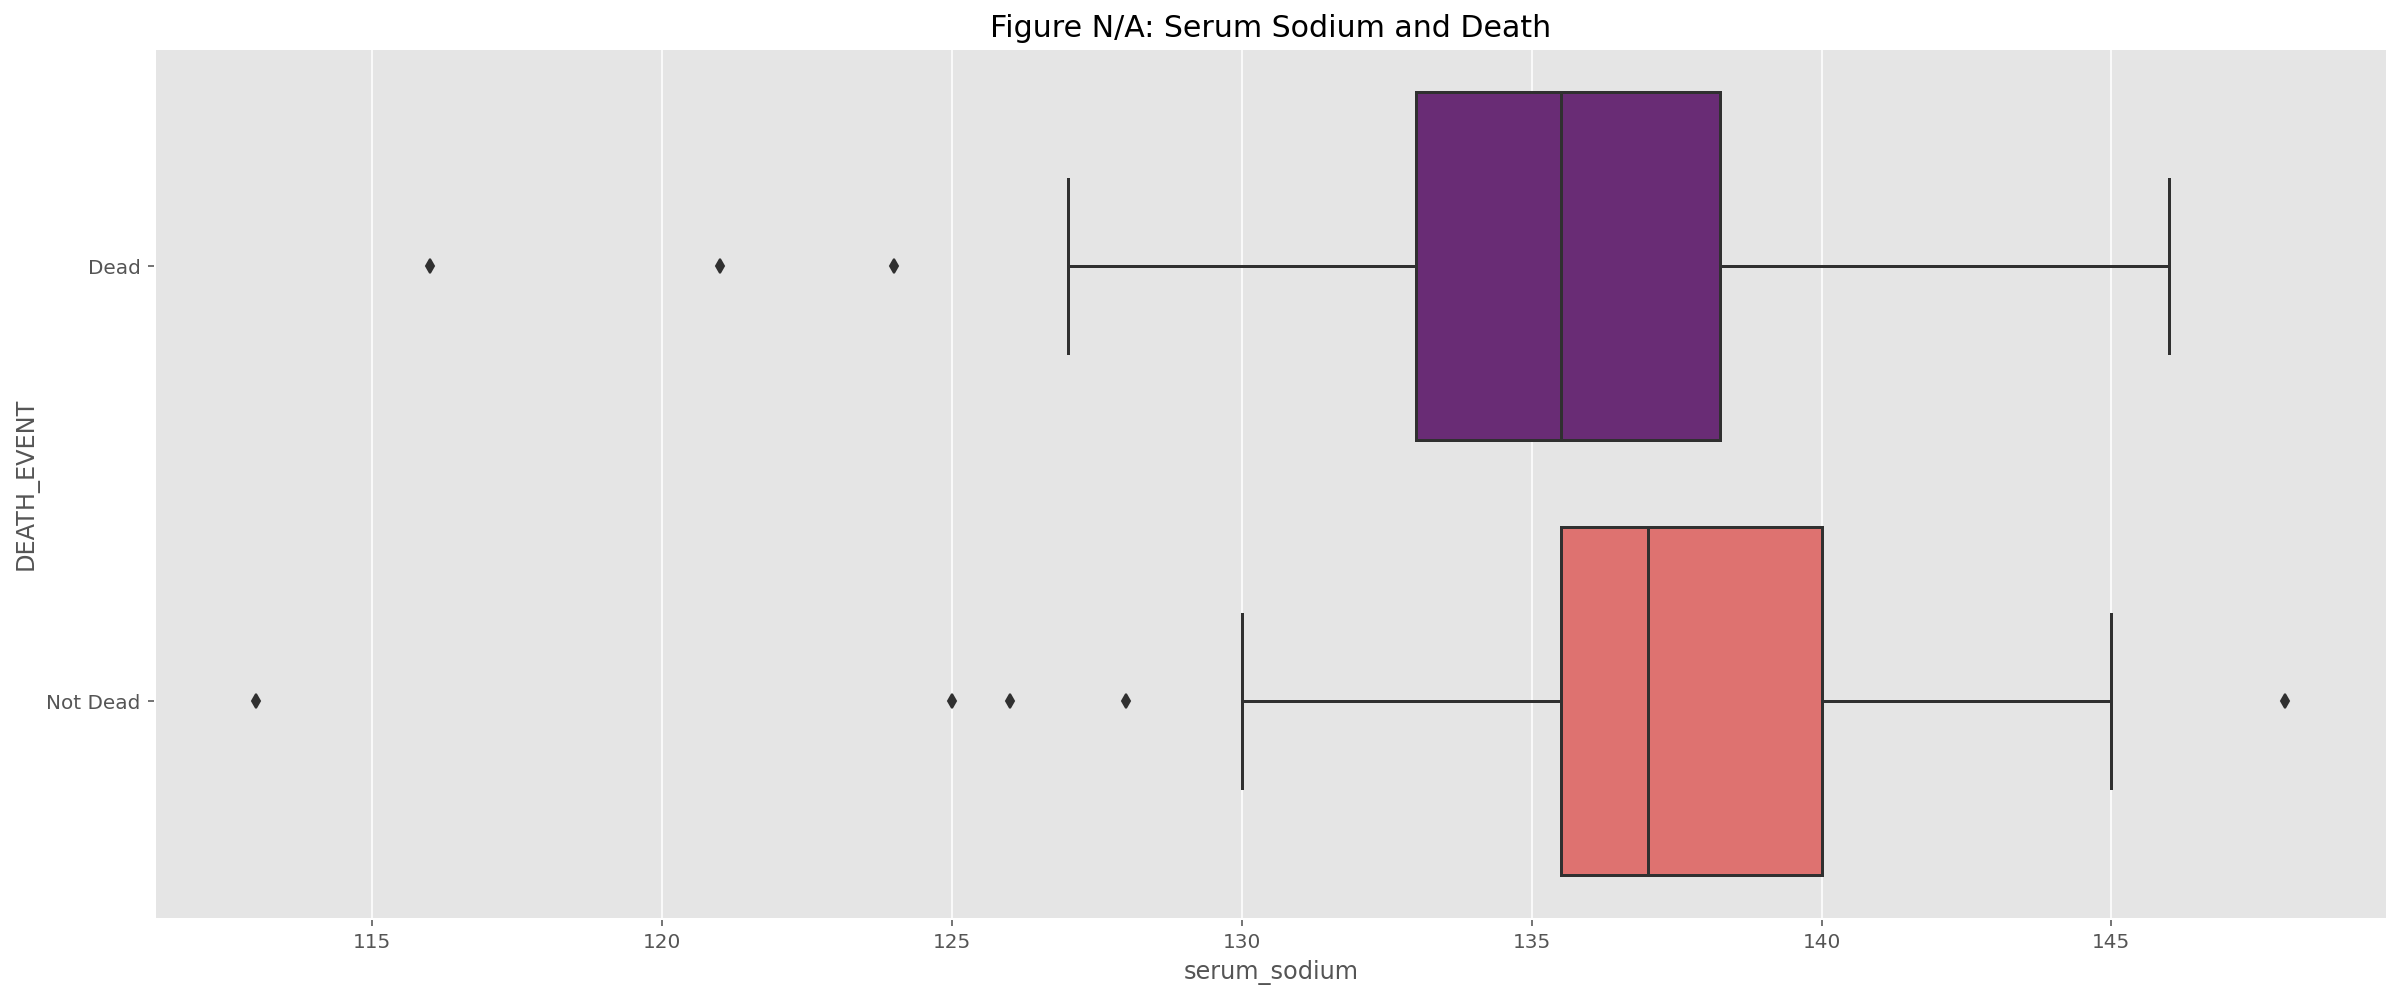

In [32]:
plt.figure(figsize = (20,8))
sns.boxplot(g_df['serum_sodium'], g_df['DEATH_EVENT'], palette = 'magma');
plt.title('Figure N/A: Serum Sodium and Death', fontsize = 15)
plt.show();

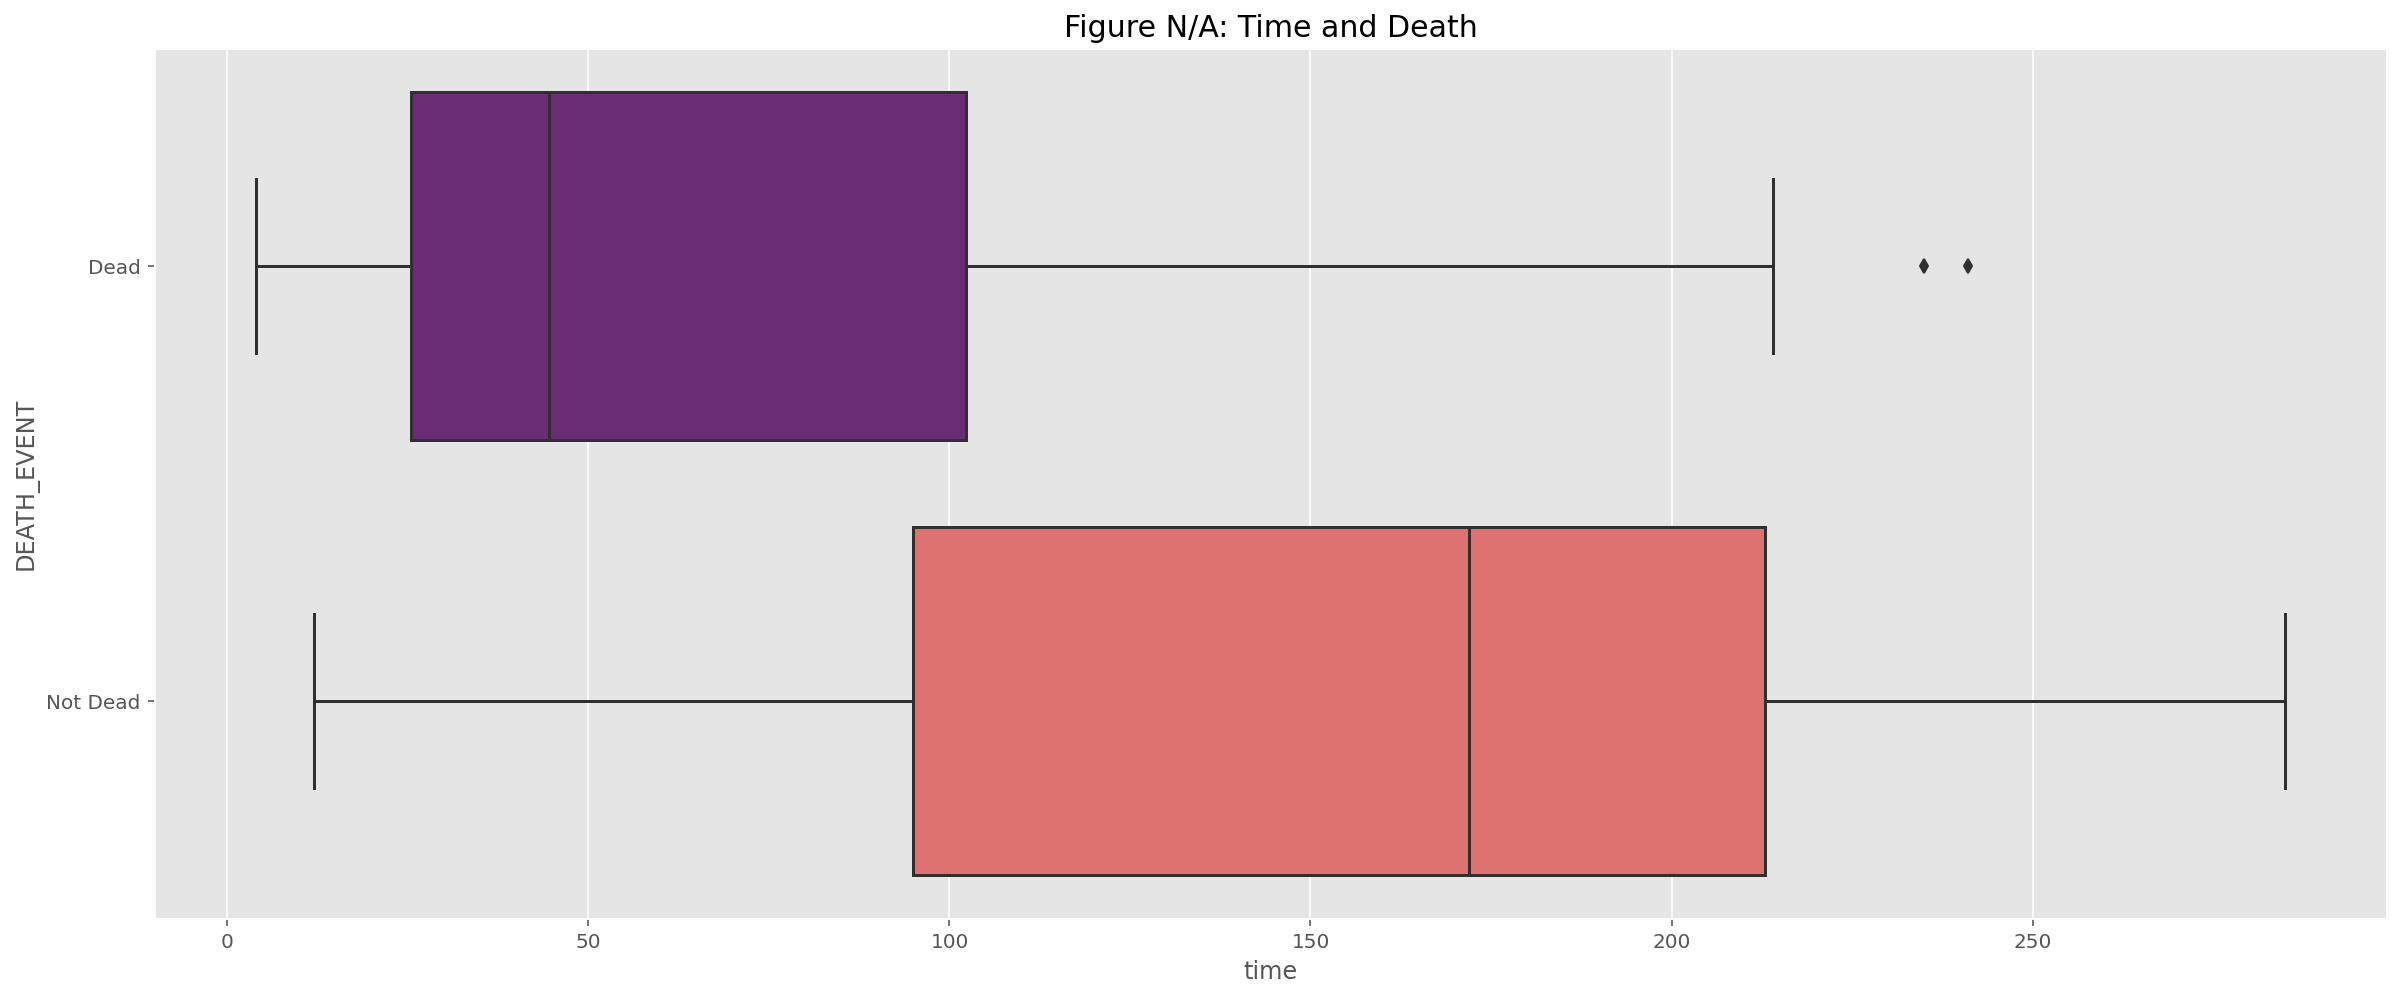

In [33]:
plt.figure(figsize = (20,8))
sns.boxplot(g_df['time'], g_df['DEATH_EVENT'], palette = 'magma');
plt.title('Figure N/A: Time and Death', fontsize = 15)
plt.show();

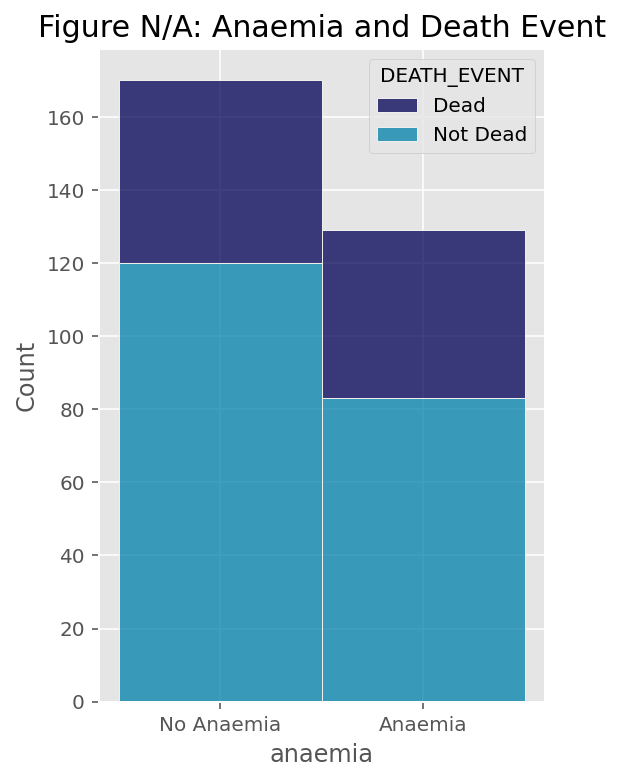

In [34]:
plt.figure(figsize = (4,6))
sns.histplot(binwidth=0.5, x="anaemia", hue="DEATH_EVENT", data=g_df, stat="count", multiple="stack", palette='ocean')
plt.title('Figure N/A: Anaemia and Death Event', fontsize = 15)
plt.show();

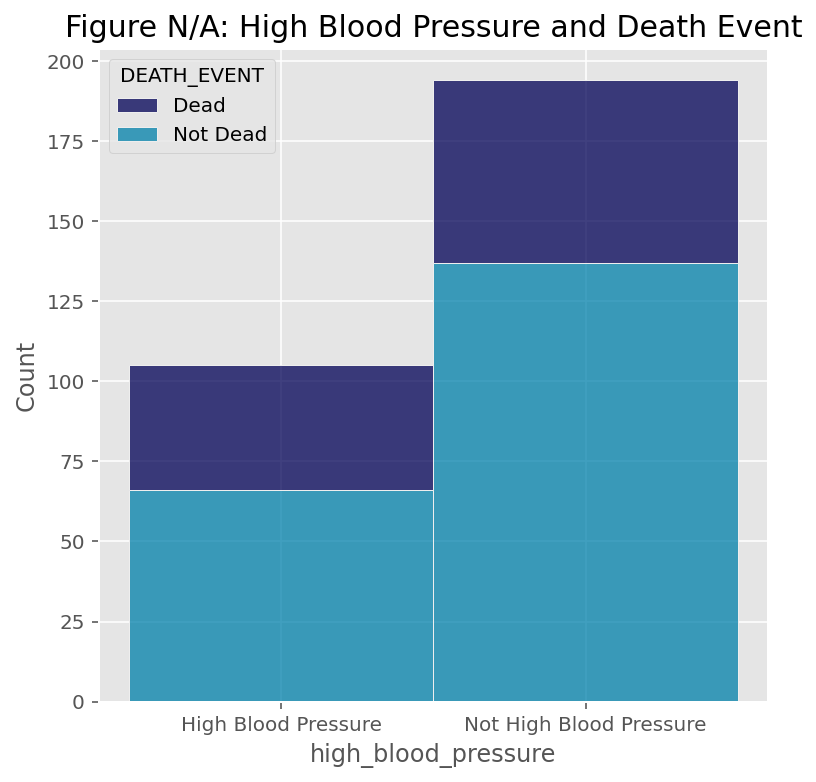

In [35]:
plt.figure(figsize = (6,6))
sns.histplot(binwidth=0.5, x="high_blood_pressure", hue="DEATH_EVENT", data=g_df, stat="count", multiple="stack", palette='ocean')
plt.title('Figure N/A: High Blood Pressure and Death Event', fontsize = 15)
plt.show();

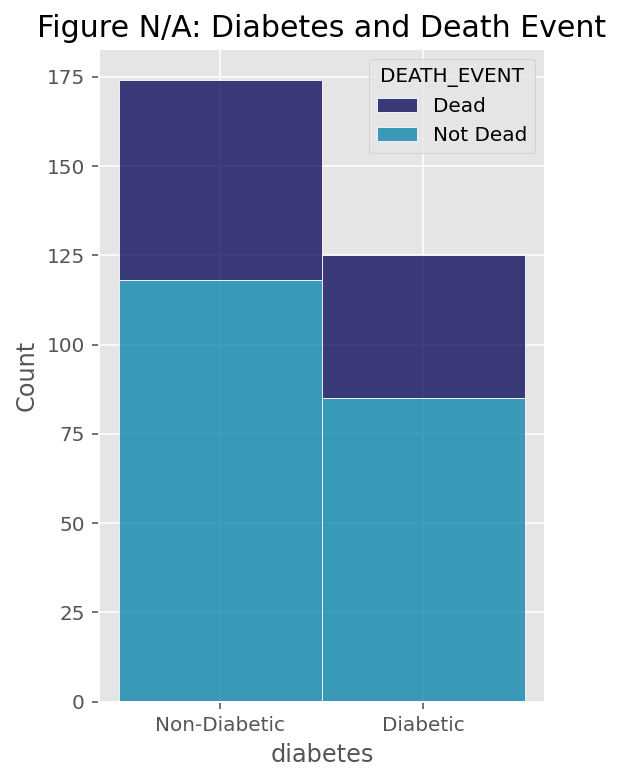

In [36]:
plt.figure(figsize = (4,6))
sns.histplot(binwidth=0.5, x="diabetes", hue="DEATH_EVENT", data=g_df, stat="count", multiple="stack", palette='ocean')
plt.title('Figure N/A: Diabetes and Death Event', fontsize = 15)
plt.show();

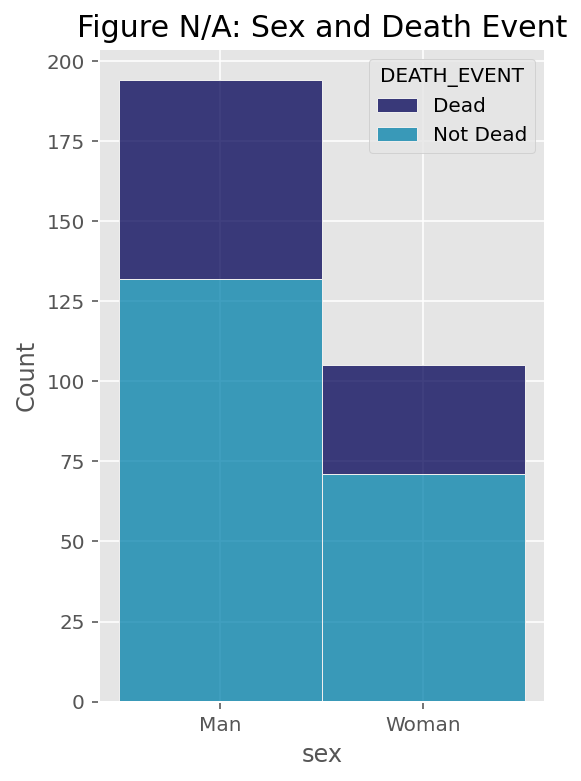

In [37]:
plt.figure(figsize = (4,6))
sns.histplot(binwidth=0.5, x="sex", hue="DEATH_EVENT", data=g_df, stat="count", multiple="stack", palette='ocean')
plt.title('Figure N/A: Sex and Death Event', fontsize = 15)
plt.show();

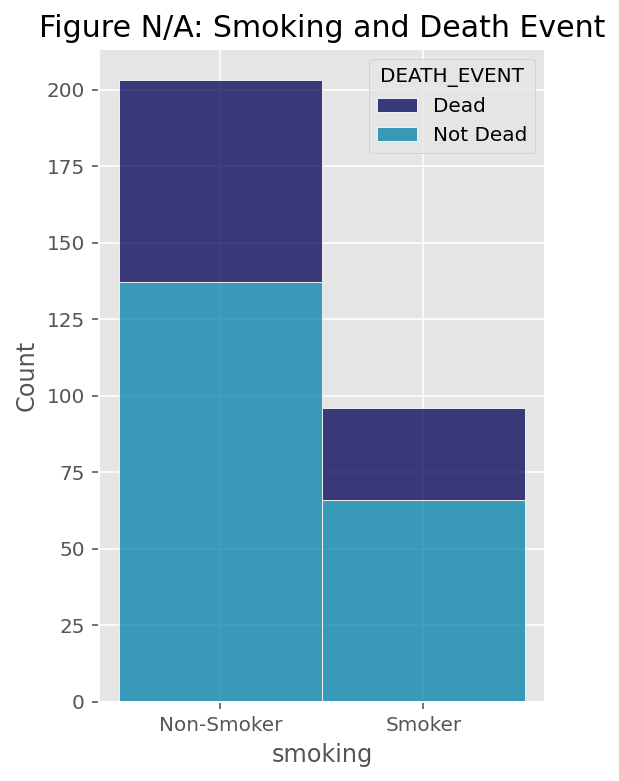

In [38]:
plt.figure(figsize = (4,6))
sns.histplot(binwidth=0.5, x="smoking", hue="DEATH_EVENT", data=g_df, stat="count", multiple="stack", palette='ocean')
plt.title('Figure N/A: Smoking and Death Event', fontsize = 15)
plt.show();

# Task 3: Data Modelling

## Classification

### K Nearest Neighbours

### explain how i chose parameters and stuff

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn import metrics

In [40]:
Y = df["DEATH_EVENT"].copy()
y = Y.to_numpy()
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [41]:
X = df.copy()
del X["DEATH_EVENT"]
x = X.to_numpy()
x

array([[7.500e+01, 0.000e+00, 5.820e+02, ..., 1.000e+00, 0.000e+00,
        4.000e+00],
       [5.500e+01, 0.000e+00, 7.861e+03, ..., 1.000e+00, 0.000e+00,
        6.000e+00],
       [6.500e+01, 0.000e+00, 1.460e+02, ..., 1.000e+00, 1.000e+00,
        7.000e+00],
       ...,
       [4.500e+01, 0.000e+00, 2.060e+03, ..., 0.000e+00, 0.000e+00,
        2.780e+02],
       [4.500e+01, 0.000e+00, 2.413e+03, ..., 1.000e+00, 1.000e+00,
        2.800e+02],
       [5.000e+01, 0.000e+00, 1.960e+02, ..., 1.000e+00, 1.000e+00,
        2.850e+02]])

In [42]:
print(x.shape,y.shape)

(299, 12) (299,)


#### Feature Selection: 

In [43]:
from sklearn.utils import shuffle
new_Ind = []
cur_MaxScore = 0.0
col_num = 12
col_Ind_Random = shuffle(range(0,col_num), random_state=1)

In [44]:
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = x[:, new_Ind]
    x_train, x_test, y_train, y_test = train_test_split(newData,y, test_size=0.4, random_state=0)
    clf = KNeighborsClassifier(5, weights='uniform', p=1)
    fit = clf.fit(x_train, y_train)
    cur_Score = clf.score(x_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 1 selected features: 0.5583333333333333
Score with 2 selected features: 0.5666666666666667
Score with 3 selected features: 0.625
Score with 4 selected features: 0.65
Score with 5 selected features: 0.6916666666666667
Score with 6 selected features: 0.7083333333333334
Score with 7 selected features: 0.7333333333333333
Score with 8 selected features: 0.7333333333333333
Score with 9 selected features: 0.7583333333333333
Score with 10 selected features: 0.7666666666666667


In [45]:
best_features = X.columns[new_Ind].values
new_features = X[best_features].copy()
new_x = new_features.to_numpy()

In [46]:
new_x.shape

(299, 10)

#### Test and Train

In [47]:
test_size = 0.4
x_train, x_test, y_train, y_test = train_test_split(new_x,y,test_size=test_size,random_state=6)

In [48]:
x_train.shape, x_test.shape

((179, 10), (120, 10))

In [49]:
y_train.shape, y_test.shape

((179,), (120,))

In [50]:
from sklearn.metrics import classification_report
## maybe also need a selection for the 5
## maybe do my own little for loop thing if im feeling it
clf = KNeighborsClassifier(5, weights='distance', p = 1)
fit = clf.fit(x_train, y_train)
y_pre = fit.predict(x_test)
cm = confusion_matrix(y_test, y_pre)
print(cm)
print(classification_report(y_test,y_pre))

[[73  6]
 [21 20]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.84        79
           1       0.77      0.49      0.60        41

    accuracy                           0.78       120
   macro avg       0.77      0.71      0.72       120
weighted avg       0.77      0.78      0.76       120



In [51]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pre))

Accuracy: 0.775


### Decision Tree

### explain reasonings for parameters and stuff

In [52]:
from sklearn.tree import DecisionTreeClassifier 

In [53]:
dx_train, dx_test, dy_train, dy_test = train_test_split(x, y, test_size=0.3, random_state=1) 

In [54]:
d_clf = DecisionTreeClassifier(max_depth=3)
d_clf = d_clf.fit(dx_train, dy_train)
dy_pre = d_clf.predict(dx_test)
print("Accuracy:",metrics.accuracy_score(dy_test, dy_pre))

Accuracy: 0.8222222222222222


In [56]:
cm = confusion_matrix(dy_test, dy_pre)
print(cm)

[[58  6]
 [10 16]]


In [57]:
print(classification_report(dy_test, dy_pre))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        64
           1       0.73      0.62      0.67        26

    accuracy                           0.82        90
   macro avg       0.79      0.76      0.77        90
weighted avg       0.82      0.82      0.82        90



In [66]:
from sklearn import tree
with open('heart_attack_2.dot', 'w') as f:
    f = tree.export_graphviz(d_clf, out_file = f,
                            feature_names=X.columns,
                            class_names="DEATH_EVENT",
                            filled=True,
                            rounded=True,
                            special_characters=True)